<a href="https://colab.research.google.com/github/Takemaru-Yoshida/Buntai-Rating/blob/main/Buntai_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers
!pip install fugashi
!pip install ipadic
!pip install umap-learn
!pip install mecab-python3
!pip install unidic-lite
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=2c37c9c84e221827b5bed554092576ff5a125d44d78ec836bbd799fe0a804df2
  Stored in directory: /root/.cache/pip/wheels/5b/ea/e3/2f6e0860a327daba3b030853fce4483ed37468bbf1101c59c3
Successfully built ipadic
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=f7f027780ffbd7a49617642631d2ebf8c257a9e0e2ad1644bac4007ec404c3cc
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1

In [2]:
# 文豪15名の青空文庫内における全作品リスト
# コメントアウトしている作品は、重複が確認された作品
urls = {
"芥川龍之介" : [
"https://www.aozora.gr.jp/cards/000879/files/3752_27328.html",
"https://www.aozora.gr.jp/cards/000879/files/24455_11250.html",
"https://www.aozora.gr.jp/cards/000879/files/88_15189.html",
"https://www.aozora.gr.jp/cards/000879/files/43361_17877.html",
"https://www.aozora.gr.jp/cards/000879/files/3814_27290.html",
"https://www.aozora.gr.jp/cards/000879/files/3789_27348.html",
"https://www.aozora.gr.jp/cards/000879/files/2327_13464.html",
"https://www.aozora.gr.jp/cards/000879/files/3778_27322.html",
"https://www.aozora.gr.jp/cards/000879/files/3757_27354.html",
"https://www.aozora.gr.jp/cards/000879/files/2324_13461.html",
"https://www.aozora.gr.jp/cards/000879/files/3822_27341.html",
"https://www.aozora.gr.jp/cards/000879/files/3798_27357.html",
"https://www.aozora.gr.jp/cards/000879/files/114_15224.html",
"https://www.aozora.gr.jp/cards/000879/files/3780_27336.html",
"https://www.aozora.gr.jp/cards/000879/files/3749_27331.html",
"https://www.aozora.gr.jp/cards/000879/files/43380_26107.html",
"https://www.aozora.gr.jp/cards/000879/files/3765_27347.html",
"https://www.aozora.gr.jp/cards/000879/files/2367_13455.html",
"https://www.aozora.gr.jp/cards/000879/files/3816_27302.html",
"https://www.aozora.gr.jp/cards/000879/files/3783_27346.html",
"https://www.aozora.gr.jp/cards/000879/files/93_14953.html",
"https://www.aozora.gr.jp/cards/000879/files/43387_17881.html",
"https://www.aozora.gr.jp/cards/000879/files/2368_13456.html",
"https://www.aozora.gr.jp/cards/000879/files/33202_12224.html",
"https://www.aozora.gr.jp/cards/000879/files/3763_27285.html",
"https://www.aozora.gr.jp/cards/000879/files/3781_27339.html",
"https://www.aozora.gr.jp/cards/000879/files/3811_27330.html",
"https://www.aozora.gr.jp/cards/000879/files/1137_6765.html",
"https://www.aozora.gr.jp/cards/000879/files/3809_26610.html",
"https://www.aozora.gr.jp/cards/000879/files/43383_26108.html",
"https://www.aozora.gr.jp/cards/000879/files/3808_27326.html",
"https://www.aozora.gr.jp/cards/000879/files/3793_27315.html",
"https://www.aozora.gr.jp/cards/000879/files/3747_27294.html",
"https://www.aozora.gr.jp/cards/000879/files/43369_26102.html",
"https://www.aozora.gr.jp/cards/000879/files/3782_27351.html",
"https://www.aozora.gr.jp/cards/000879/files/43364_26113.html",
"https://www.aozora.gr.jp/cards/000879/files/3753_27325.html",
"https://www.aozora.gr.jp/cards/000879/files/1132_6754.html",
"https://www.aozora.gr.jp/cards/000879/files/3796_27344.html",
"https://www.aozora.gr.jp/cards/000879/files/3774_27324.html",
"https://www.aozora.gr.jp/cards/000879/files/4303_6772.html",
"https://www.aozora.gr.jp/cards/000879/files/1130_15234.html",
"https://www.aozora.gr.jp/cards/000879/files/2369_13457.html",
"https://www.aozora.gr.jp/cards/000879/files/43376_26116.html",
"https://www.aozora.gr.jp/cards/000879/files/3827_27278.html",
"https://www.aozora.gr.jp/cards/000879/files/22_15282.html",
"https://www.aozora.gr.jp/cards/000879/files/3800_27289.html",
"https://www.aozora.gr.jp/cards/000879/files/3805_27350.html",
"https://www.aozora.gr.jp/cards/000879/files/43362_26111.html",
"https://www.aozora.gr.jp/cards/000879/files/3742_27306.html",
"https://www.aozora.gr.jp/cards/000879/files/3788_27362.html",
"https://www.aozora.gr.jp/cards/000879/files/168_13453.html",
"https://www.aozora.gr.jp/cards/000879/files/1136_15283.html",
"https://www.aozora.gr.jp/cards/000879/files/3804_27277.html",
"https://www.aozora.gr.jp/cards/000879/files/60859_75912.html",
"https://www.aozora.gr.jp/cards/000879/files/2321_13452.html",
"https://www.aozora.gr.jp/cards/000879/files/151_13451.html",
"https://www.aozora.gr.jp/cards/000879/files/24_15235.html",
"https://www.aozora.gr.jp/cards/000879/files/35_15166.html",
"https://www.aozora.gr.jp/cards/000879/files/2328_13465.html",
"https://www.aozora.gr.jp/cards/000879/files/3754_27334.html",
"https://www.aozora.gr.jp/cards/000879/files/1131_6775.html",
"https://www.aozora.gr.jp/cards/000879/files/3801_27309.html",
"https://www.aozora.gr.jp/cards/000879/files/3758_27329.html",
"https://www.aozora.gr.jp/cards/000879/files/89_15188.html",
"https://www.aozora.gr.jp/cards/000879/files/3773_27316.html",
"https://www.aozora.gr.jp/cards/000879/files/3824_27286.html",
"https://www.aozora.gr.jp/cards/000879/files/3748_27281.html",
"https://www.aozora.gr.jp/cards/000879/files/4304_15236.html",
"https://www.aozora.gr.jp/cards/000879/files/43385_17882.html",
"https://www.aozora.gr.jp/cards/000879/files/1127_17681.html",
"https://www.aozora.gr.jp/cards/000879/files/3785_27340.html",
"https://www.aozora.gr.jp/cards/000879/files/51214_56018.html",
"https://www.aozora.gr.jp/cards/000879/files/113_15225.html",
"https://www.aozora.gr.jp/cards/000879/files/4313_33771.html",
"https://www.aozora.gr.jp/cards/000879/files/4275_6755.html",
"https://www.aozora.gr.jp/cards/000879/files/3786_27337.html",
"https://www.aozora.gr.jp/cards/000879/files/3746_27314.html",
"https://www.aozora.gr.jp/cards/000879/files/29_15178.html",
"https://www.aozora.gr.jp/cards/000879/files/120_15173.html",
"https://www.aozora.gr.jp/cards/000879/files/189_15140.html",
"https://www.aozora.gr.jp/cards/000879/files/63_15200.html",
"https://www.aozora.gr.jp/cards/000879/files/16034_33783.html",
"https://www.aozora.gr.jp/cards/000879/files/2366_13454.html",
"https://www.aozora.gr.jp/cards/000879/files/177_15162.html",
"https://www.aozora.gr.jp/cards/000879/files/43368_17878.html",
"https://www.aozora.gr.jp/cards/000879/files/109_15222.html",
"https://www.aozora.gr.jp/cards/000879/files/13_14563.html",
"https://www.aozora.gr.jp/cards/000879/files/4278_6762.html",
"https://www.aozora.gr.jp/cards/000879/files/140_15196.html",
"https://www.aozora.gr.jp/cards/000879/files/135_15221.html",
"https://www.aozora.gr.jp/cards/000879/files/102_14482.html",
"https://www.aozora.gr.jp/cards/000879/files/60574_71364.html",
"https://www.aozora.gr.jp/cards/000879/files/178_14584.html",
"https://www.aozora.gr.jp/cards/000879/files/3799_27359.html",
"https://www.aozora.gr.jp/cards/000879/files/56820_60877.html",
"https://www.aozora.gr.jp/cards/000879/files/4614_6777.html",
"https://www.aozora.gr.jp/cards/000879/files/157_15212.html",
"https://www.aozora.gr.jp/cards/000879/files/160_15199.html",
"https://www.aozora.gr.jp/cards/000879/files/4302_6769.html",
"https://www.aozora.gr.jp/cards/000879/files/4279_6943.html",
"https://www.aozora.gr.jp/cards/000879/files/181_15256.html",
"https://www.aozora.gr.jp/cards/000879/files/46_15233.html",
"https://www.aozora.gr.jp/cards/000879/files/33_15213.html",
"https://www.aozora.gr.jp/cards/000879/files/83_15058.html",
"https://www.aozora.gr.jp/cards/000879/files/3772_27291.html",
"https://www.aozora.gr.jp/cards/000879/files/1138_15285.html",
"https://www.aozora.gr.jp/cards/000879/files/3759_27317.html",
"https://www.aozora.gr.jp/cards/000879/files/78_15185.html",
"https://www.aozora.gr.jp/cards/000879/files/104_15099.html",
"https://www.aozora.gr.jp/cards/000879/files/3760_27332.html",
"https://www.aozora.gr.jp/cards/000879/files/3802_27292.html",
"https://www.aozora.gr.jp/cards/000879/files/92_14545.html",
"https://www.aozora.gr.jp/cards/000879/files/3777_27343.html",
"https://www.aozora.gr.jp/cards/000879/files/1124_14252.html",
"https://www.aozora.gr.jp/cards/000879/files/3741_27345.html",
"https://www.aozora.gr.jp/cards/000879/files/82_15191.html",
"https://www.aozora.gr.jp/cards/000879/files/107_15150.html",
"https://www.aozora.gr.jp/cards/000879/files/146_15197.html",
"https://www.aozora.gr.jp/cards/000879/files/117_14836.html",
"https://www.aozora.gr.jp/cards/000879/files/96_15248.html",
"https://www.aozora.gr.jp/cards/000879/files/24453_47037.html",
"https://www.aozora.gr.jp/cards/000879/files/43017_17431.html",
"https://www.aozora.gr.jp/cards/000879/files/98_15272.html",
"https://www.aozora.gr.jp/cards/000879/files/1134_6760.html",
"https://www.aozora.gr.jp/cards/000879/files/152_15211.html",
"https://www.aozora.gr.jp/cards/000879/files/112_15227.html",
"https://www.aozora.gr.jp/cards/000879/files/144_15208.html",
"https://www.aozora.gr.jp/cards/000879/files/1133_6771.html",
"https://www.aozora.gr.jp/cards/000879/files/20_14619.html",
"https://www.aozora.gr.jp/cards/000879/files/30_15215.html",
"https://www.aozora.gr.jp/cards/000879/files/172_15218.html",
"https://www.aozora.gr.jp/cards/000879/files/190_15141.html",
"https://www.aozora.gr.jp/cards/000879/files/131_15263.html",
"https://www.aozora.gr.jp/cards/000879/files/3812_27356.html",
"https://www.aozora.gr.jp/cards/000879/files/3803_27296.html",
"https://www.aozora.gr.jp/cards/000879/files/115_14856.html",
"https://www.aozora.gr.jp/cards/000879/files/164_15214.html",
"https://www.aozora.gr.jp/cards/000879/files/3810_27321.html",
"https://www.aozora.gr.jp/cards/000879/files/3764_27288.html",
"https://www.aozora.gr.jp/cards/000879/files/4273_6753.html",
"https://www.aozora.gr.jp/cards/000879/files/4628_9312.html",
"https://www.aozora.gr.jp/cards/000879/files/3767_27279.html",
"https://www.aozora.gr.jp/cards/000879/files/150_15210.html",
"https://www.aozora.gr.jp/cards/000879/files/137_15195.html",
"https://www.aozora.gr.jp/cards/000879/files/119_15169.html",
"https://www.aozora.gr.jp/cards/000879/files/123_15167.html",
"https://www.aozora.gr.jp/cards/000879/files/142_15207.html",
"https://www.aozora.gr.jp/cards/000879/files/51_15242.html",
"https://www.aozora.gr.jp/cards/000879/files/3743_27363.html",
"https://www.aozora.gr.jp/cards/000879/files/97_15251.html",
"https://www.aozora.gr.jp/cards/000879/files/110_15223.html",
"https://www.aozora.gr.jp/cards/000879/files/125_15170.html",
"https://www.aozora.gr.jp/cards/000879/files/148_15134.html",
"https://www.aozora.gr.jp/cards/000879/files/133_14546.html",
"https://www.aozora.gr.jp/cards/000879/files/3807_27320.html",
"https://www.aozora.gr.jp/cards/000879/files/167_15143.html",
"https://www.aozora.gr.jp/cards/000879/files/43016_16836.html",
"https://www.aozora.gr.jp/cards/000879/files/169_15145.html",
"https://www.aozora.gr.jp/cards/000879/files/2692_27728.html",
"https://www.aozora.gr.jp/cards/000879/files/74_15176.html",
"https://www.aozora.gr.jp/cards/000879/files/100_15253.html",
"https://www.aozora.gr.jp/cards/000879/files/187_15258.html",
"https://www.aozora.gr.jp/cards/000879/files/154_15206.html",
"https://www.aozora.gr.jp/cards/000879/files/3768_27364.html",
"https://www.aozora.gr.jp/cards/000879/files/34_15220.html",
"https://www.aozora.gr.jp/cards/000879/files/145_15147.html",
"https://www.aozora.gr.jp/cards/000879/files/147_15135.html",
"https://www.aozora.gr.jp/cards/000879/files/103_15250.html",
"https://www.aozora.gr.jp/cards/000879/files/129_15155.html",
"https://www.aozora.gr.jp/cards/000879/files/99_15249.html",
"https://www.aozora.gr.jp/cards/000879/files/65_14907.html",
"https://www.aozora.gr.jp/cards/000879/files/70_15179.html",
"https://www.aozora.gr.jp/cards/000879/files/3828_28511.html",
"https://www.aozora.gr.jp/cards/000879/files/28_15270.html",
"https://www.aozora.gr.jp/cards/000879/files/116_15168.html",
"https://www.aozora.gr.jp/cards/000879/files/143_15209.html",
"https://www.aozora.gr.jp/cards/000879/files/111_15148.html",
"https://www.aozora.gr.jp/cards/000879/files/166_15219.html",
"https://www.aozora.gr.jp/cards/000879/files/139_15128.html",
"https://www.aozora.gr.jp/cards/000879/files/84_15192.html",
"https://www.aozora.gr.jp/cards/000879/files/71_15180.html",
"https://www.aozora.gr.jp/cards/000879/files/128_15261.html",
"https://www.aozora.gr.jp/cards/000879/files/127_15260.html",
"https://www.aozora.gr.jp/cards/000879/files/53_15243.html",
"https://www.aozora.gr.jp/cards/000879/files/42_15228.html",
"https://www.aozora.gr.jp/cards/000879/files/54_15238.html",
"https://www.aozora.gr.jp/cards/000879/files/130_15275.html",
"https://www.aozora.gr.jp/cards/000879/files/57_15160.html",
"https://www.aozora.gr.jp/cards/000879/files/121_15172.html",
"https://www.aozora.gr.jp/cards/000879/files/18_14822.html",
"https://www.aozora.gr.jp/cards/000879/files/175_15164.html",
"https://www.aozora.gr.jp/cards/000879/files/14_14602.html",
"https://www.aozora.gr.jp/cards/000879/files/163_15142.html",
"https://www.aozora.gr.jp/cards/000879/files/76_15182.html",
"https://www.aozora.gr.jp/cards/000879/files/186_15257.html",
"https://www.aozora.gr.jp/cards/000879/files/86_15241.html",
"https://www.aozora.gr.jp/cards/000879/files/52_15239.html",
"https://www.aozora.gr.jp/cards/000879/files/183_15274.html",
"https://www.aozora.gr.jp/cards/000879/files/51865_40605.html",
"https://www.aozora.gr.jp/cards/000879/files/80_15183.html",
"https://www.aozora.gr.jp/cards/000879/files/58_14823.html",
"https://www.aozora.gr.jp/cards/000879/files/161_15133.html",
"https://www.aozora.gr.jp/cards/000879/files/185_15194.html",
"https://www.aozora.gr.jp/cards/000879/files/27_15245.html",
"https://www.aozora.gr.jp/cards/000879/files/1125_14253.html",
"https://www.aozora.gr.jp/cards/000879/files/176_15165.html",
"https://www.aozora.gr.jp/cards/000879/files/138_15156.html",
"https://www.aozora.gr.jp/cards/000879/files/1126_14251.html",
"https://www.aozora.gr.jp/cards/000879/files/95_15247.html",
"https://www.aozora.gr.jp/cards/000879/files/43_15268.html",
"https://www.aozora.gr.jp/cards/000879/files/3776_27323.html",
"https://www.aozora.gr.jp/cards/000879/files/51216_56022.html",
"https://www.aozora.gr.jp/cards/000879/files/75_15187.html",
"https://www.aozora.gr.jp/cards/000879/files/3740_27319.html",
"https://www.aozora.gr.jp/cards/000879/files/162_15131.html",
"https://www.aozora.gr.jp/cards/000879/files/91_15186.html",
"https://www.aozora.gr.jp/cards/000879/files/149_15204.html",
"https://www.aozora.gr.jp/cards/000879/files/72_14932.html",
"https://www.aozora.gr.jp/cards/000879/files/51217_56023.html",
"https://www.aozora.gr.jp/cards/000879/files/56_15161.html",
"https://www.aozora.gr.jp/cards/000879/files/180_15273.html",
"https://www.aozora.gr.jp/cards/000879/files/106_15226.html",
"https://www.aozora.gr.jp/cards/000879/files/43014_17430.html",
# "https://www.aozora.gr.jp/cards/000879/files/15_14583.html",
"https://www.aozora.gr.jp/cards/000879/files/188_15281.html",
"https://www.aozora.gr.jp/cards/000879/files/24454_47036.html",
"https://www.aozora.gr.jp/cards/000879/files/66_14906.html",
"https://www.aozora.gr.jp/cards/000879/files/126_14861.html",
"https://www.aozora.gr.jp/cards/000879/files/179_15255.html",
"https://www.aozora.gr.jp/cards/000879/files/191_15139.html",
"https://www.aozora.gr.jp/cards/000879/files/3762_27361.html",
"https://www.aozora.gr.jp/cards/000879/files/62_15198.html",
"https://www.aozora.gr.jp/cards/000879/files/41_15229.html",
"https://www.aozora.gr.jp/cards/000879/files/182_15254.html",
"https://www.aozora.gr.jp/cards/000879/files/122_15159.html",
"https://www.aozora.gr.jp/cards/000879/files/68_15177.html",
"https://www.aozora.gr.jp/cards/000879/files/21_15157.html",
"https://www.aozora.gr.jp/cards/000879/files/87_15106.html",
"https://www.aozora.gr.jp/cards/000879/files/73_15158.html",
"https://www.aozora.gr.jp/cards/000879/files/43015_17432.html",
"https://www.aozora.gr.jp/cards/000879/files/134_15262.html",
"https://www.aozora.gr.jp/cards/000879/files/170_15144.html",
"https://www.aozora.gr.jp/cards/000879/files/171_15237.html",
"https://www.aozora.gr.jp/cards/000879/files/49_15269.html",
"https://www.aozora.gr.jp/cards/000879/files/45_15230.html",
"https://www.aozora.gr.jp/cards/000879/files/105_15146.html",
"https://www.aozora.gr.jp/cards/000879/files/64_15175.html",
"https://www.aozora.gr.jp/cards/000879/files/3739_27303.html",
"https://www.aozora.gr.jp/cards/000879/files/46227_26608.html",
"https://www.aozora.gr.jp/cards/000879/files/136_15193.html",
"https://www.aozora.gr.jp/cards/000879/files/49328_33646.html",
"https://www.aozora.gr.jp/cards/000879/files/90_14976.html",
"https://www.aozora.gr.jp/cards/000879/files/174_15163.html",
"https://www.aozora.gr.jp/cards/000879/files/16_14570.html",
"https://www.aozora.gr.jp/cards/000879/files/3738_27300.html",
"https://www.aozora.gr.jp/cards/000879/files/47_15276.html",
"https://www.aozora.gr.jp/cards/000879/files/1141_15265.html",
"https://www.aozora.gr.jp/cards/000879/files/165_15240.html",
"https://www.aozora.gr.jp/cards/000879/files/118_14835.html",
"https://www.aozora.gr.jp/cards/000879/files/3744_27360.html",
"https://www.aozora.gr.jp/cards/000879/files/79_14954.html",
"https://www.aozora.gr.jp/cards/000879/files/39_15184.html",
"https://www.aozora.gr.jp/cards/000879/files/101_15252.html",
"https://www.aozora.gr.jp/cards/000879/files/36_14975.html",
"https://www.aozora.gr.jp/cards/000879/files/108_15149.html",
"https://www.aozora.gr.jp/cards/000879/files/32_14481.html",
"https://www.aozora.gr.jp/cards/000879/files/46672_34485.html",
"https://www.aozora.gr.jp/cards/000879/files/23_15267.html",
"https://www.aozora.gr.jp/cards/000879/files/19_14618.html",
"https://www.aozora.gr.jp/cards/000879/files/173_15216.html",
"https://www.aozora.gr.jp/cards/000879/files/141_15127.html",
"https://www.aozora.gr.jp/cards/000879/files/55_14824.html",
"https://www.aozora.gr.jp/cards/000879/files/50_15246.html",
"https://www.aozora.gr.jp/cards/000879/files/156_15202.html",
"https://www.aozora.gr.jp/cards/000879/files/155_15203.html",
"https://www.aozora.gr.jp/cards/000879/files/17_14601.html",
"https://www.aozora.gr.jp/cards/000879/files/3745_27318.html",
"https://www.aozora.gr.jp/cards/000879/files/67_15174.html",
"https://www.aozora.gr.jp/cards/000879/files/159_15201.html",
"https://www.aozora.gr.jp/cards/000879/files/16033_33773.html",
"https://www.aozora.gr.jp/cards/000879/files/37_14479.html",
"https://www.aozora.gr.jp/cards/000879/files/55721_50756.html",
"https://www.aozora.gr.jp/cards/000879/files/38_14487.html",
"https://www.aozora.gr.jp/cards/000879/files/48_15266.html",
"https://www.aozora.gr.jp/cards/000879/files/77_15181.html",
"https://www.aozora.gr.jp/cards/000879/files/42377_34745.html",
"https://www.aozora.gr.jp/cards/000879/files/40_15151.html",
"https://www.aozora.gr.jp/cards/000879/files/124_15171.html",
"https://www.aozora.gr.jp/cards/000879/files/60_15129.html",
"https://www.aozora.gr.jp/cards/000879/files/61_15130.html",
"https://www.aozora.gr.jp/cards/000879/files/43751_27955.html",
"https://www.aozora.gr.jp/cards/000879/files/81_14934.html",
"https://www.aozora.gr.jp/cards/000879/files/51215_56381.html",
"https://www.aozora.gr.jp/cards/000879/files/45761_39095.html",
"https://www.aozora.gr.jp/cards/000879/files/158_15132.html",
"https://www.aozora.gr.jp/cards/000879/files/184_15259.html",
"https://www.aozora.gr.jp/cards/000879/files/69_14933.html",
"https://www.aozora.gr.jp/cards/000879/files/59_14480.html",
"https://www.aozora.gr.jp/cards/000879/files/153_15205.html",
"https://www.aozora.gr.jp/cards/000879/files/132_15264.html",
"https://www.aozora.gr.jp/cards/000879/files/31_15217.html",
"https://www.aozora.gr.jp/cards/000879/files/26_15271.html",
],

"泉鏡花" : [
"https://www.aozora.gr.jp/cards/000050/files/1180_10283.html",
"https://www.aozora.gr.jp/cards/000050/files/3580_7929.html",
"https://www.aozora.gr.jp/cards/000050/files/50789_44659.html",
"https://www.aozora.gr.jp/cards/000050/files/33225_12177.html",
"https://www.aozora.gr.jp/cards/000050/files/50797_62553.html",
"https://www.aozora.gr.jp/cards/000050/files/55401_50158.html",
"https://www.aozora.gr.jp/cards/000050/files/4592_26584.html",
"https://www.aozora.gr.jp/cards/000050/files/1100_20516.html",
"https://www.aozora.gr.jp/cards/000050/files/4593_26587.html",
"https://www.aozora.gr.jp/cards/000050/files/50773_44654.html",
"https://www.aozora.gr.jp/cards/000050/files/50775_44656.html",
"https://www.aozora.gr.jp/cards/000050/files/4245_10284.html",
"https://www.aozora.gr.jp/cards/000050/files/57485_60105.html",
"https://www.aozora.gr.jp/cards/000050/files/50772_44653.html",
"https://www.aozora.gr.jp/cards/000050/files/4149_6483.html",
"https://www.aozora.gr.jp/cards/000050/files/3579_13853.html",
"https://www.aozora.gr.jp/cards/000050/files/50782_44685.html",
"https://www.aozora.gr.jp/cards/000050/files/48388_57068.html",
"https://www.aozora.gr.jp/cards/000050/files/3541_20542.html",
"https://www.aozora.gr.jp/cards/000050/files/4247_6481.html",
"https://www.aozora.gr.jp/cards/000050/files/4596_44650.html",
"https://www.aozora.gr.jp/cards/000050/files/4148_6476.html",
"https://www.aozora.gr.jp/cards/000050/files/1040_20511.html",
"https://www.aozora.gr.jp/cards/000050/files/48384_35153.html",
# "https://www.aozora.gr.jp/cards/000050/files/4575_24910.html",
"https://www.aozora.gr.jp/cards/000050/files/3582_6473.html",
"https://www.aozora.gr.jp/cards/000050/files/1182_20550.html",
"https://www.aozora.gr.jp/cards/000050/files/46566_24911.html",
"https://www.aozora.gr.jp/cards/000050/files/50788_63059.html",
"https://www.aozora.gr.jp/cards/000050/files/1175_20313.html",
"https://www.aozora.gr.jp/cards/000050/files/4573_74049.html",
"https://www.aozora.gr.jp/cards/000050/files/57476_59459.html",
"https://www.aozora.gr.jp/cards/000050/files/4594_44658.html",
"https://www.aozora.gr.jp/cards/000050/files/4740_13832.html",
"https://www.aozora.gr.jp/cards/000050/files/48410_35161.html",
"https://www.aozora.gr.jp/cards/000050/files/47337_28598.html",
"https://www.aozora.gr.jp/cards/000050/files/4597_44689.html",
"https://www.aozora.gr.jp/cards/000050/files/3426_9675.html",
"https://www.aozora.gr.jp/cards/000050/files/50776_44661.html",
"https://www.aozora.gr.jp/cards/000050/files/50786_44690.html",
"https://www.aozora.gr.jp/cards/000050/files/50774_44655.html",
"https://www.aozora.gr.jp/cards/000050/files/4576_74048.html",
"https://www.aozora.gr.jp/cards/000050/files/4589_26583.html",
"https://www.aozora.gr.jp/cards/000050/files/50781_44682.html",
"https://www.aozora.gr.jp/cards/000050/files/3427_9676.html",
"https://www.aozora.gr.jp/cards/000050/files/1061_17986.html",
"https://www.aozora.gr.jp/cards/000050/files/48398_56973.html",
"https://www.aozora.gr.jp/cards/000050/files/4741_10285.html",
"https://www.aozora.gr.jp/cards/000050/files/1188_22308.html",
"https://www.aozora.gr.jp/cards/000050/files/3581_33654.html",
"https://www.aozora.gr.jp/cards/000050/files/57484_60106.html",
"https://www.aozora.gr.jp/cards/000050/files/48329_33335.html",
"https://www.aozora.gr.jp/cards/000050/files/1186_20037.html",
"https://www.aozora.gr.jp/cards/000050/files/48327_33333.html",
"https://www.aozora.gr.jp/cards/000050/files/48332_33336.html",
"https://www.aozora.gr.jp/cards/000050/files/3648_12114.html",
"https://www.aozora.gr.jp/cards/000050/files/4248_6482.html",
"https://www.aozora.gr.jp/cards/000050/files/3647_33653.html",
"https://www.aozora.gr.jp/cards/000050/files/1173_20513.html",
"https://www.aozora.gr.jp/cards/000050/files/48404_35157.html",
"https://www.aozora.gr.jp/cards/000050/files/50794_65466.html",
"https://www.aozora.gr.jp/cards/000050/files/50105_54220.html",
"https://www.aozora.gr.jp/cards/000050/files/3650_12120.html",
"https://www.aozora.gr.jp/cards/000050/files/50770_44649.html",
"https://www.aozora.gr.jp/cards/000050/files/50824_77449.html",
"https://www.aozora.gr.jp/cards/000050/files/1185_20153.html",
"https://www.aozora.gr.jp/cards/000050/files/43225_20152.html",
"https://www.aozora.gr.jp/cards/000050/files/4249_6475.html",
"https://www.aozora.gr.jp/cards/000050/files/4150_6479.html",
"https://www.aozora.gr.jp/cards/000050/files/48406_35158.html",
"https://www.aozora.gr.jp/cards/000050/files/50793_65465.html",
"https://www.aozora.gr.jp/cards/000050/files/3245_19570.html",
"https://www.aozora.gr.jp/cards/000050/files/1187_20038.html",
"https://www.aozora.gr.jp/cards/000050/files/1184_20151.html",
"https://www.aozora.gr.jp/cards/000050/files/43224_20150.html",
"https://www.aozora.gr.jp/cards/000050/files/50771_44652.html",
"https://www.aozora.gr.jp/cards/000050/files/360_19397.html",
"https://www.aozora.gr.jp/cards/000050/files/50780_63870.html",
"https://www.aozora.gr.jp/cards/000050/files/4588_44657.html",
"https://www.aozora.gr.jp/cards/000050/files/45755_24359.html",
"https://www.aozora.gr.jp/cards/000050/files/3424_12110.html",
"https://www.aozora.gr.jp/cards/000050/files/4595_44684.html",
"https://www.aozora.gr.jp/cards/000050/files/48397_35155.html",
"https://www.aozora.gr.jp/cards/000050/files/48331_33338.html",
"https://www.aozora.gr.jp/cards/000050/files/3649_12116.html",
"https://www.aozora.gr.jp/cards/000050/files/50769_44648.html",
"https://www.aozora.gr.jp/cards/000050/files/57486_59626.html",
"https://www.aozora.gr.jp/cards/000050/files/1189_22309.html",
"https://www.aozora.gr.jp/cards/000050/files/3578_19568.html",
"https://www.aozora.gr.jp/cards/000050/files/1183_20548.html",
"https://www.aozora.gr.jp/cards/000050/files/50778_44662.html",
"https://www.aozora.gr.jp/cards/000050/files/3425_9674.html",
"https://www.aozora.gr.jp/cards/000050/files/48385_57479.html",
"https://www.aozora.gr.jp/cards/000050/files/4585_44683.html",
"https://www.aozora.gr.jp/cards/000050/files/4583_74405.html",
"https://www.aozora.gr.jp/cards/000050/files/4577_76509.html",
"https://www.aozora.gr.jp/cards/000050/files/50792_64352.html",
"https://www.aozora.gr.jp/cards/000050/files/50779_44663.html",
"https://www.aozora.gr.jp/cards/000050/files/50787_44691.html",
"https://www.aozora.gr.jp/cards/000050/files/50777_44675.html",
"https://www.aozora.gr.jp/cards/000050/files/4582_74406.html",
"https://www.aozora.gr.jp/cards/000050/files/48387_35154.html",
"https://www.aozora.gr.jp/cards/000050/files/50785_44688.html",
"https://www.aozora.gr.jp/cards/000050/files/50790_63058.html",
"https://www.aozora.gr.jp/cards/000050/files/48328_34401.html",
"https://www.aozora.gr.jp/cards/000050/files/1176_20566.html",
"https://www.aozora.gr.jp/cards/000050/files/3652_26094.html",
"https://www.aozora.gr.jp/cards/000050/files/57477_59458.html",
"https://www.aozora.gr.jp/cards/000050/files/4739_13830.html",
"https://www.aozora.gr.jp/cards/000050/files/3545_12128.html",
"https://www.aozora.gr.jp/cards/000050/files/897_20742.html",
"https://www.aozora.gr.jp/cards/000050/files/4584_44651.html",
"https://www.aozora.gr.jp/cards/000050/files/48403_35156.html",
"https://www.aozora.gr.jp/cards/000050/files/3423_12108.html",
"https://www.aozora.gr.jp/cards/000050/files/4586_44687.html",
"https://www.aozora.gr.jp/cards/000050/files/57488_59627.html",
"https://www.aozora.gr.jp/cards/000050/files/3657_26095.html",
"https://www.aozora.gr.jp/cards/000050/files/4557_12112.html",
"https://www.aozora.gr.jp/cards/000050/files/57475_59618.html",
"https://www.aozora.gr.jp/cards/000050/files/4265_23653.html",
"https://www.aozora.gr.jp/cards/000050/files/48393_34760.html",
"https://www.aozora.gr.jp/cards/000050/files/50784_44686.html",
"https://www.aozora.gr.jp/cards/000050/files/48333_33337.html",
"https://www.aozora.gr.jp/cards/000050/files/3548_19572.html",
"https://www.aozora.gr.jp/cards/000050/files/3551_12122.html",
"https://www.aozora.gr.jp/cards/000050/files/50768_63869.html",
"https://www.aozora.gr.jp/cards/000050/files/1177_20567.html",
"https://www.aozora.gr.jp/cards/000050/files/3543_12126.html",
"https://www.aozora.gr.jp/cards/000050/files/1037_20651.html",
"https://www.aozora.gr.jp/cards/000050/files/1091_20649.html",
"https://www.aozora.gr.jp/cards/000050/files/57471_60107.html",
"https://www.aozora.gr.jp/cards/000050/files/3654_26092.html",
"https://www.aozora.gr.jp/cards/000050/files/57489_59619.html",
"https://www.aozora.gr.jp/cards/000050/files/529_20653.html",
"https://www.aozora.gr.jp/cards/000050/files/50542_65739.html",
"https://www.aozora.gr.jp/cards/000050/files/48401_35162.html",
"https://www.aozora.gr.jp/cards/000050/files/48386_60908.html",
"https://www.aozora.gr.jp/cards/000050/files/4564_21653.html",
"https://www.aozora.gr.jp/cards/000050/files/33204_12204.html",
"https://www.aozora.gr.jp/cards/000050/files/3655_26093.html",
"https://www.aozora.gr.jp/cards/000050/files/48334_42629.html",
"https://www.aozora.gr.jp/cards/000050/files/3315_19574.html",
"https://www.aozora.gr.jp/cards/000050/files/3547_19576.html",
"https://www.aozora.gr.jp/cards/000050/files/4581_76229.html",
"https://www.aozora.gr.jp/cards/000050/files/3664_20581.html",
"https://www.aozora.gr.jp/cards/000050/files/50541_66089.html",
"https://www.aozora.gr.jp/cards/000050/files/4560_9734.html",
"https://www.aozora.gr.jp/cards/000050/files/48409_35159.html",
"https://www.aozora.gr.jp/cards/000050/files/45941_26582.html",
"https://www.aozora.gr.jp/cards/000050/files/4562_70099.html",
"https://www.aozora.gr.jp/cards/000050/files/4997_12169.html",
"https://www.aozora.gr.jp/cards/000050/files/48396_57482.html",
"https://www.aozora.gr.jp/cards/000050/files/1178_23555.html",
"https://www.aozora.gr.jp/cards/000050/files/3312_20647.html",
"https://www.aozora.gr.jp/cards/000050/files/4870_12167.html",
"https://www.aozora.gr.jp/cards/000050/files/48390_35164.html",
"https://www.aozora.gr.jp/cards/000050/files/48411_35160.html",
"https://www.aozora.gr.jp/cards/000050/files/3542_12165.html",
"https://www.aozora.gr.jp/cards/000050/files/46532_23812.html",
"https://www.aozora.gr.jp/cards/000050/files/3661_22422.html",
"https://www.aozora.gr.jp/cards/000050/files/3549_19579.html",
"https://www.aozora.gr.jp/cards/000050/files/3065_24401.html",
"https://www.aozora.gr.jp/cards/000050/files/48402_62552.html",
"https://www.aozora.gr.jp/cards/000050/files/3244_24408.html",
"https://www.aozora.gr.jp/cards/000050/files/3544_12124.html",
"https://www.aozora.gr.jp/cards/000050/files/3659_22420.html",
"https://www.aozora.gr.jp/cards/000050/files/3656_26097.html",
"https://www.aozora.gr.jp/cards/000050/files/4559_26238.html",
"https://www.aozora.gr.jp/cards/000050/files/3662_12206.html",
"https://www.aozora.gr.jp/cards/000050/files/1174_20553.html",
"https://www.aozora.gr.jp/cards/000050/files/3660_22421.html",
"https://www.aozora.gr.jp/cards/000050/files/4264_23652.html",
"https://www.aozora.gr.jp/cards/000050/files/3407_19566.html",
"https://www.aozora.gr.jp/cards/000050/files/4558_26237.html",
"https://www.aozora.gr.jp/cards/000050/files/48330_45584.html",
"https://www.aozora.gr.jp/cards/000050/files/3653_26096.html",
"https://www.aozora.gr.jp/cards/000050/files/2296_23810.html",
"https://www.aozora.gr.jp/cards/000050/files/363_20915.html",
"https://www.aozora.gr.jp/cards/000050/files/48392_44380.html",
"https://www.aozora.gr.jp/cards/000050/files/3651_26098.html",
"https://www.aozora.gr.jp/cards/000050/files/48408_35165.html",
"https://www.aozora.gr.jp/cards/000050/files/43466_26099.html",
"https://www.aozora.gr.jp/cards/000050/files/521_20583.html",
"https://www.aozora.gr.jp/cards/000050/files/3587_19541.html",
"https://www.aozora.gr.jp/cards/000050/files/4563_24909.html",
"https://www.aozora.gr.jp/cards/000050/files/1179_23556.html",
"https://www.aozora.gr.jp/cards/000050/files/50110_71665.html",
"https://www.aozora.gr.jp/cards/000050/files/48416_42914.html",
"https://www.aozora.gr.jp/cards/000050/files/3658_24699.html",
"https://www.aozora.gr.jp/cards/000050/files/4742_42546.html",
"https://www.aozora.gr.jp/cards/000050/files/50102_52784.html",
"https://www.aozora.gr.jp/cards/000050/files/48414_48537.html",
"https://www.aozora.gr.jp/cards/000050/files/48415_42913.html",
"https://www.aozora.gr.jp/cards/000050/files/4561_50802.html",
"https://www.aozora.gr.jp/cards/000050/files/4743_27481.html",
"https://www.aozora.gr.jp/cards/000050/files/50108_72104.html",
"https://www.aozora.gr.jp/cards/000050/files/3663_33334.html",
"https://www.aozora.gr.jp/cards/000050/files/48400_47272.html",
"https://www.aozora.gr.jp/cards/000050/files/48399_66308.html",
"https://www.aozora.gr.jp/cards/000050/files/43467_27909.html",
"https://www.aozora.gr.jp/cards/000050/files/3586_12103.html",
"https://www.aozora.gr.jp/cards/000050/files/48405_47842.html",
"https://www.aozora.gr.jp/cards/000050/files/4635_18082.html",
"https://www.aozora.gr.jp/cards/000050/files/4565_57474.html",
"https://www.aozora.gr.jp/cards/000050/files/1087_34456.html",
],

"江戸川乱歩" : [
"https://www.aozora.gr.jp/cards/001779/files/58465_64921.html",
"https://www.aozora.gr.jp/cards/001779/files/57197_58748.html",
"https://www.aozora.gr.jp/cards/001779/files/57316_64615.html",
"https://www.aozora.gr.jp/cards/001779/files/57414_60021.html",
"https://www.aozora.gr.jp/cards/001779/files/57192_59570.html",
"https://www.aozora.gr.jp/cards/001779/files/59526_77619.html",
"https://www.aozora.gr.jp/cards/001779/files/57509_64373.html",
"https://www.aozora.gr.jp/cards/001779/files/57506_61255.html",
"https://www.aozora.gr.jp/cards/001779/files/57165_60481.html",
"https://www.aozora.gr.jp/cards/001779/files/58464_64920.html",
"https://www.aozora.gr.jp/cards/001779/files/57186_60204.html",
"https://www.aozora.gr.jp/cards/001779/files/57193_59571.html",
"https://www.aozora.gr.jp/cards/001779/files/57190_58247.html",
"https://www.aozora.gr.jp/cards/001779/files/57505_61256.html",
"https://www.aozora.gr.jp/cards/001779/files/57188_59493.html",
"https://www.aozora.gr.jp/cards/001779/files/57518_66083.html",
"https://www.aozora.gr.jp/cards/001779/files/58699_68471.html",
"https://www.aozora.gr.jp/cards/001779/files/60174_75916.html",
"https://www.aozora.gr.jp/cards/001779/files/57520_67338.html",
"https://www.aozora.gr.jp/cards/001779/files/57227_58852.html",
"https://www.aozora.gr.jp/cards/001779/files/59305_75186.html",
"https://www.aozora.gr.jp/cards/001779/files/57194_60116.html",
"https://www.aozora.gr.jp/cards/001779/files/57513_65499.html",
"https://www.aozora.gr.jp/cards/001779/files/57508_62543.html",
"https://www.aozora.gr.jp/cards/001779/files/57514_62876.html",
"https://www.aozora.gr.jp/cards/001779/files/57195_62845.html",
"https://www.aozora.gr.jp/cards/001779/files/58590_68472.html",
"https://www.aozora.gr.jp/cards/001779/files/57191_62846.html",
"https://www.aozora.gr.jp/cards/001779/files/57504_62544.html",
"https://www.aozora.gr.jp/cards/001779/files/57187_60205.html",
"https://www.aozora.gr.jp/cards/001779/files/57196_59567.html",
"https://www.aozora.gr.jp/cards/001779/files/57189_63360.html",
"https://www.aozora.gr.jp/cards/001779/files/57226_58906.html",
"https://www.aozora.gr.jp/cards/001779/files/58462_67337.html",
"https://www.aozora.gr.jp/cards/001779/files/57510_64374.html",
"https://www.aozora.gr.jp/cards/001779/files/57182_60051.html",
"https://www.aozora.gr.jp/cards/001779/files/57343_60022.html",
"https://www.aozora.gr.jp/cards/001779/files/57512_65498.html",
"https://www.aozora.gr.jp/cards/001779/files/56648_58207.html",
"https://www.aozora.gr.jp/cards/001779/files/57521_69565.html",
"https://www.aozora.gr.jp/cards/001779/files/57511_65228.html",
"https://www.aozora.gr.jp/cards/001779/files/56647_58167.html",
"https://www.aozora.gr.jp/cards/001779/files/56645_58203.html",
"https://www.aozora.gr.jp/cards/001779/files/57185_60117.html",
"https://www.aozora.gr.jp/cards/001779/files/57181_59566.html",
"https://www.aozora.gr.jp/cards/001779/files/57184_63359.html",
"https://www.aozora.gr.jp/cards/001779/files/56650_58209.html",
"https://www.aozora.gr.jp/cards/001779/files/56646_58241.html",
"https://www.aozora.gr.jp/cards/001779/files/57183_60052.html",
"https://www.aozora.gr.jp/cards/001779/files/57105_59659.html",
"https://www.aozora.gr.jp/cards/001779/files/56687_65751.html",
"https://www.aozora.gr.jp/cards/001779/files/56649_59494.html",
"https://www.aozora.gr.jp/cards/001779/files/57516_71931.html",
"https://www.aozora.gr.jp/cards/001779/files/57515_69340.html",
"https://www.aozora.gr.jp/cards/001779/files/57225_58936.html",
"https://www.aozora.gr.jp/cards/001779/files/57243_71307.html",
"https://www.aozora.gr.jp/cards/001779/files/58463_69566.html",
"https://www.aozora.gr.jp/cards/001779/files/57245_73861.html",
"https://www.aozora.gr.jp/cards/001779/files/56686_65473.html",
"https://www.aozora.gr.jp/cards/001779/files/57230_59480.html",
"https://www.aozora.gr.jp/cards/001779/files/56690_66103.html",
"https://www.aozora.gr.jp/cards/001779/files/57519_73889.html",
"https://www.aozora.gr.jp/cards/001779/files/57503_74223.html",
"https://www.aozora.gr.jp/cards/001779/files/57517_71306.html",
"https://www.aozora.gr.jp/cards/001779/files/57533_74073.html",
"https://www.aozora.gr.jp/cards/001779/files/58039_61573.html",
"https://www.aozora.gr.jp/cards/001779/files/56682_64942.html",
"https://www.aozora.gr.jp/cards/001779/files/56684_65242.html",
"https://www.aozora.gr.jp/cards/001779/files/56691_68508.html",
"https://www.aozora.gr.jp/cards/001779/files/57109_60816.html",
"https://www.aozora.gr.jp/cards/001779/files/56683_63072.html",
"https://www.aozora.gr.jp/cards/001779/files/56688_63544.html",
"https://www.aozora.gr.jp/cards/001779/files/56680_62855.html",
"https://www.aozora.gr.jp/cards/001779/files/56681_63348.html",
"https://www.aozora.gr.jp/cards/001779/files/56678_62114.html",
"https://www.aozora.gr.jp/cards/001779/files/56677_60227.html",
"https://www.aozora.gr.jp/cards/001779/files/57108_60897.html",
"https://www.aozora.gr.jp/cards/001779/files/56679_62562.html",
"https://www.aozora.gr.jp/cards/001779/files/56651_58766.html",
"https://www.aozora.gr.jp/cards/001779/files/56676_61994.html",
"https://www.aozora.gr.jp/cards/001779/files/56689_63891.html",
"https://www.aozora.gr.jp/cards/001779/files/57107_64125.html",
"https://www.aozora.gr.jp/cards/001779/files/56671_59636.html",
"https://www.aozora.gr.jp/cards/001779/files/56675_60137.html",
"https://www.aozora.gr.jp/cards/001779/files/56674_61591.html",
"https://www.aozora.gr.jp/cards/001779/files/56673_58827.html",
"https://www.aozora.gr.jp/cards/001779/files/57106_64350.html",
"https://www.aozora.gr.jp/cards/001779/files/58333_76414.html",
"https://www.aozora.gr.jp/cards/001779/files/56672_61232.html",
"https://www.aozora.gr.jp/cards/001779/files/58053_62875.html",
"https://www.aozora.gr.jp/cards/001779/files/57229_61350.html",
"https://www.aozora.gr.jp/cards/001779/files/57532_74052.html",
"https://www.aozora.gr.jp/cards/001779/files/56669_58756.html",
"https://www.aozora.gr.jp/cards/001779/files/57405_60036.html",
"https://www.aozora.gr.jp/cards/001779/files/57228_58735.html",
"https://www.aozora.gr.jp/cards/001779/files/57244_74203.html",
"https://www.aozora.gr.jp/cards/001779/files/57502_62061.html",
"https://www.aozora.gr.jp/cards/001779/files/57531_74232.html",
"https://www.aozora.gr.jp/cards/001779/files/57522_74224.html",
"https://www.aozora.gr.jp/cards/001779/files/56670_59551.html",
"https://www.aozora.gr.jp/cards/001779/files/58467_73706.html",
"https://www.aozora.gr.jp/cards/001779/files/56659_75917.html",
"https://www.aozora.gr.jp/cards/001779/files/57241_73705.html",
"https://www.aozora.gr.jp/cards/001779/files/57240_60918.html",
"https://www.aozora.gr.jp/cards/001779/files/58486_68507.html",
"https://www.aozora.gr.jp/cards/001779/files/58170_69341.html",
"https://www.aozora.gr.jp/cards/001779/files/57849_71930.html",
"https://www.aozora.gr.jp/cards/001779/files/56658_62864.html",
],

"梶井基次郎" : [
"https://www.aozora.gr.jp/cards/000074/files/43695_18438.html",
"https://www.aozora.gr.jp/cards/000074/files/43699_18443.html",
"https://www.aozora.gr.jp/cards/000074/files/421_19698.html",
"https://www.aozora.gr.jp/cards/000074/files/43696_18513.html",
# "https://www.aozora.gr.jp/cards/000074/files/47552_29611.html",
"https://www.aozora.gr.jp/cards/000074/files/427_19793.html",
"https://www.aozora.gr.jp/cards/000074/files/420_19696.html",
"https://www.aozora.gr.jp/cards/000074/files/3201_7619.html",
"https://www.aozora.gr.jp/cards/000074/files/418_13828.html",
"https://www.aozora.gr.jp/cards/000074/files/2384_13826.html",
"https://www.aozora.gr.jp/cards/000074/files/430_19796.html",
"https://www.aozora.gr.jp/cards/000074/files/43694_18446.html",
"https://www.aozora.gr.jp/cards/000074/files/43692_18448.html",
"https://www.aozora.gr.jp/cards/000074/files/422_19700.html",
"https://www.aozora.gr.jp/cards/000074/files/3202_7605.html",
"https://www.aozora.gr.jp/cards/000074/files/411_19633.html",
"https://www.aozora.gr.jp/cards/000074/files/3200_7613.html",
"https://www.aozora.gr.jp/cards/000074/files/43693_18447.html",
"https://www.aozora.gr.jp/cards/000074/files/3058_7617.html",
"https://www.aozora.gr.jp/cards/000074/files/43691_18440.html",
"https://www.aozora.gr.jp/cards/000074/files/415_19818.html",
"https://www.aozora.gr.jp/cards/000074/files/426_19828.html",
"https://www.aozora.gr.jp/cards/000074/files/42292_14044.html",
"https://www.aozora.gr.jp/cards/000074/files/56505_55368.html",
"https://www.aozora.gr.jp/cards/000074/files/3565_24933.html",
# "https://www.aozora.gr.jp/cards/000074/files/46349_23843.html",
"https://www.aozora.gr.jp/cards/000074/files/424_19826.html",
"https://www.aozora.gr.jp/cards/000074/files/2385_13827.html",
"https://www.aozora.gr.jp/cards/000074/files/56502_55367.html",
"https://www.aozora.gr.jp/cards/000074/files/419_19702.html",
"https://www.aozora.gr.jp/cards/000074/files/423_504.html",
"https://www.aozora.gr.jp/cards/000074/files/428_19704.html",
"https://www.aozora.gr.jp/cards/000074/files/414_19798.html",
"https://www.aozora.gr.jp/cards/000074/files/413_19694.html",
"https://www.aozora.gr.jp/cards/000074/files/416_19814.html",
"https://www.aozora.gr.jp/cards/000074/files/431_43526.html",
"https://www.aozora.gr.jp/cards/000074/files/417_19816.html",
"https://www.aozora.gr.jp/cards/000074/files/412_19692.html",
"https://www.aozora.gr.jp/cards/000074/files/425_19812.html",
"https://www.aozora.gr.jp/cards/000074/files/429_19794.html",
],

"国木田独歩" : [
"https://www.aozora.gr.jp/cards/000038/files/42204_34795.html",
"https://www.aozora.gr.jp/cards/000038/files/42207_34797.html",
"https://www.aozora.gr.jp/cards/000038/files/42206_34792.html",
"https://www.aozora.gr.jp/cards/000038/files/1408_14561.html",
"https://www.aozora.gr.jp/cards/000038/files/42205_34796.html",
"https://www.aozora.gr.jp/cards/000038/files/325_15964.html",
"https://www.aozora.gr.jp/cards/000038/files/42209_34791.html",
"https://www.aozora.gr.jp/cards/000038/files/330_15712.html",
"https://www.aozora.gr.jp/cards/000038/files/335_15795.html",
"https://www.aozora.gr.jp/cards/000038/files/331_15986.html",
"https://www.aozora.gr.jp/cards/000038/files/43272_16114.html",
"https://www.aozora.gr.jp/cards/000038/files/1411_16038.html",
# "https://www.aozora.gr.jp/cards/000038/files/1410_15991.html",
"https://www.aozora.gr.jp/cards/000038/files/42208_48331.html",
"https://www.aozora.gr.jp/cards/000038/files/1406_15987.html",
# "https://www.aozora.gr.jp/cards/000038/files/326_15713.html",
"https://www.aozora.gr.jp/cards/000038/files/1055_15939.html",
"https://www.aozora.gr.jp/cards/000038/files/334_15956.html",
"https://www.aozora.gr.jp/cards/000038/files/328_15937.html",
"https://www.aozora.gr.jp/cards/000038/files/321_15946.html",
"https://www.aozora.gr.jp/cards/000038/files/1044_15933.html",
"https://www.aozora.gr.jp/cards/000038/files/42198_34793.html",
"https://www.aozora.gr.jp/cards/000038/files/51289_40581.html",
"https://www.aozora.gr.jp/cards/000038/files/42203_48329.html",
"https://www.aozora.gr.jp/cards/000038/files/1057_15980.html",
"https://www.aozora.gr.jp/cards/000038/files/2945_16039.html",
"https://www.aozora.gr.jp/cards/000038/files/42200_34794.html",
"https://www.aozora.gr.jp/cards/000038/files/1407_16147.html",
"https://www.aozora.gr.jp/cards/000038/files/327_43413.html",
"https://www.aozora.gr.jp/cards/000038/files/324_15711.html",
"https://www.aozora.gr.jp/cards/000038/files/1409_34798.html",
"https://www.aozora.gr.jp/cards/000038/files/333_22323.html",
"https://www.aozora.gr.jp/cards/000038/files/42202_48332.html",
"https://www.aozora.gr.jp/cards/000038/files/56412_55372.html",
"https://www.aozora.gr.jp/cards/000038/files/42201_16624.html",
"https://www.aozora.gr.jp/cards/000038/files/322_15794.html",
"https://www.aozora.gr.jp/cards/000038/files/42210_48330.html",
"https://www.aozora.gr.jp/cards/000038/files/4318_15756.html",
"https://www.aozora.gr.jp/cards/000038/files/42199_48119.html",
"https://www.aozora.gr.jp/cards/000038/files/4514_15757.html",
"https://www.aozora.gr.jp/cards/000038/files/329_15886.html",
"https://www.aozora.gr.jp/cards/000038/files/323_43411.html",
"https://www.aozora.gr.jp/cards/000038/files/336_15957.html",
"https://www.aozora.gr.jp/cards/000038/files/43243_16115.html",
"https://www.aozora.gr.jp/cards/000038/files/332_43412.html",
],

"坂口安吾" : [
"https://www.aozora.gr.jp/cards/001095/files/61127_77708.html",
"https://www.aozora.gr.jp/cards/001095/files/42817_23710.html",
"https://www.aozora.gr.jp/cards/001095/files/42995_21283.html",
"https://www.aozora.gr.jp/cards/001095/files/42815_26157.html",
"https://www.aozora.gr.jp/cards/001095/files/42984_21270.html",
"https://www.aozora.gr.jp/cards/001095/files/45739_36064.html",
"https://www.aozora.gr.jp/cards/001095/files/43155_30637.html",
"https://www.aozora.gr.jp/cards/001095/files/42884_23713.html",
"https://www.aozora.gr.jp/cards/001095/files/42857_34302.html",
"https://www.aozora.gr.jp/cards/001095/files/42991_21275.html",
"https://www.aozora.gr.jp/cards/001095/files/45884_32911.html",
"https://www.aozora.gr.jp/cards/001095/files/42992_21280.html",
"https://www.aozora.gr.jp/cards/001095/files/45865_32916.html",
"https://www.aozora.gr.jp/cards/001095/files/42859_31182.html",
"https://www.aozora.gr.jp/cards/001095/files/42872_31181.html",
"https://www.aozora.gr.jp/cards/001095/files/42990_21277.html",
"https://www.aozora.gr.jp/cards/001095/files/45851_32924.html",
"https://www.aozora.gr.jp/cards/001095/files/42988_21272.html",
# "https://www.aozora.gr.jp/cards/001095/files/42987_21273.html",
"https://www.aozora.gr.jp/cards/001095/files/61162_77734.html",
# "https://www.aozora.gr.jp/cards/001095/files/45888_32921.html",
"https://www.aozora.gr.jp/cards/001095/files/45749_24335.html",
"https://www.aozora.gr.jp/cards/001095/files/42906_23101.html",
# "https://www.aozora.gr.jp/cards/001095/files/45809_34973.html",
"https://www.aozora.gr.jp/cards/001095/files/45734_23671.html",
"https://www.aozora.gr.jp/cards/001095/files/42855_31189.html",
"https://www.aozora.gr.jp/cards/001095/files/42918_23107.html",
# "https://www.aozora.gr.jp/cards/001095/files/42915_23105.html",
"https://www.aozora.gr.jp/cards/001095/files/61161_76246.html",
"https://www.aozora.gr.jp/cards/001095/files/42871_31188.html",
"https://www.aozora.gr.jp/cards/001095/files/42879_34298.html",
"https://www.aozora.gr.jp/cards/001095/files/42922_23110.html",
"https://www.aozora.gr.jp/cards/001095/files/61131_77625.html",
"https://www.aozora.gr.jp/cards/001095/files/43185_22526.html",
"https://www.aozora.gr.jp/cards/001095/files/43184_22527.html",
"https://www.aozora.gr.jp/cards/001095/files/42999_21286.html",
"https://www.aozora.gr.jp/cards/001095/files/43154_30104.html",
"https://www.aozora.gr.jp/cards/001095/files/45878_32930.html",
"https://www.aozora.gr.jp/cards/001095/files/45840_39436.html",
"https://www.aozora.gr.jp/cards/001095/files/42983_21268.html",
"https://www.aozora.gr.jp/cards/001095/files/45859_32926.html",
"https://www.aozora.gr.jp/cards/001095/files/45836_34985.html",
"https://www.aozora.gr.jp/cards/001095/files/61106_75661.html",
"https://www.aozora.gr.jp/cards/001095/files/48343_32932.html",
"https://www.aozora.gr.jp/cards/001095/files/43141_31202.html",
"https://www.aozora.gr.jp/cards/001095/files/45829_34971.html",
"https://www.aozora.gr.jp/cards/001095/files/61107_76413.html",
"https://www.aozora.gr.jp/cards/001095/files/45808_34970.html",
"https://www.aozora.gr.jp/cards/001095/files/43186_22529.html",
"https://www.aozora.gr.jp/cards/001095/files/45849_32928.html",
"https://www.aozora.gr.jp/cards/001095/files/45720_23672.html",
"https://www.aozora.gr.jp/cards/001095/files/45880_32925.html",
"https://www.aozora.gr.jp/cards/001095/files/42838_27737.html",
"https://www.aozora.gr.jp/cards/001095/files/45870_32929.html",
"https://www.aozora.gr.jp/cards/001095/files/42885_27504.html",
"https://www.aozora.gr.jp/cards/001095/files/42975_24346.html",
"https://www.aozora.gr.jp/cards/001095/files/42816_33440.html",
"https://www.aozora.gr.jp/cards/001095/files/45813_34987.html",
"https://www.aozora.gr.jp/cards/001095/files/56810_58840.html",
"https://www.aozora.gr.jp/cards/001095/files/45752_24342.html",
"https://www.aozora.gr.jp/cards/001095/files/45824_34986.html",
"https://www.aozora.gr.jp/cards/001095/files/42961_31184.html",
"https://www.aozora.gr.jp/cards/001095/files/43159_30638.html",
"https://www.aozora.gr.jp/cards/001095/files/45914_34349.html",
"https://www.aozora.gr.jp/cards/001095/files/42916_23106.html",
"https://www.aozora.gr.jp/cards/001095/files/42858_31421.html",
"https://www.aozora.gr.jp/cards/001095/files/42829_26847.html",
"https://www.aozora.gr.jp/cards/001095/files/43147_31201.html",
"https://www.aozora.gr.jp/cards/001095/files/42814_26155.html",
"https://www.aozora.gr.jp/cards/001095/files/45818_34972.html",
"https://www.aozora.gr.jp/cards/001095/files/45716_23676.html",
"https://www.aozora.gr.jp/cards/001095/files/45790_34976.html",
"https://www.aozora.gr.jp/cards/001095/files/45896_34350.html",
"https://www.aozora.gr.jp/cards/001095/files/42996_21282.html",
"https://www.aozora.gr.jp/cards/001095/files/45839_34975.html",
"https://www.aozora.gr.jp/cards/001095/files/56802_70194.html",
"https://www.aozora.gr.jp/cards/001095/files/45827_34974.html",
"https://www.aozora.gr.jp/cards/001095/files/42979_21266.html",
"https://www.aozora.gr.jp/cards/001095/files/45733_24337.html",
"https://www.aozora.gr.jp/cards/001095/files/42861_27503.html",
"https://www.aozora.gr.jp/cards/001095/files/42820_26307.html",
"https://www.aozora.gr.jp/cards/001095/files/61126_77766.html",
"https://www.aozora.gr.jp/cards/001095/files/48342_32931.html",
"https://www.aozora.gr.jp/cards/001095/files/42998_21285.html",
"https://www.aozora.gr.jp/cards/001095/files/45812_34991.html",
"https://www.aozora.gr.jp/cards/001095/files/42964_34770.html",
"https://www.aozora.gr.jp/cards/001095/files/42921_23109.html",
"https://www.aozora.gr.jp/cards/001095/files/42823_26494.html",
"https://www.aozora.gr.jp/cards/001095/files/42893_23092.html",
"https://www.aozora.gr.jp/cards/001095/files/42831_26848.html",
"https://www.aozora.gr.jp/cards/001095/files/45875_32923.html",
"https://www.aozora.gr.jp/cards/001095/files/42946_34771.html",
"https://www.aozora.gr.jp/cards/001095/files/42969_23709.html",
"https://www.aozora.gr.jp/cards/001095/files/61118_77304.html",
"https://www.aozora.gr.jp/cards/001095/files/45806_34990.html",
"https://www.aozora.gr.jp/cards/001095/files/42821_26306.html",
"https://www.aozora.gr.jp/cards/001095/files/42842_27735.html",
"https://www.aozora.gr.jp/cards/001095/files/45857_32927.html",
"https://www.aozora.gr.jp/cards/001095/files/42843_27736.html",
"https://www.aozora.gr.jp/cards/001095/files/42989_21276.html",
"https://www.aozora.gr.jp/cards/001095/files/45814_34992.html",
"https://www.aozora.gr.jp/cards/001095/files/42844_27739.html",
"https://www.aozora.gr.jp/cards/001095/files/45846_32937.html",
"https://www.aozora.gr.jp/cards/001095/files/45714_23673.html",
"https://www.aozora.gr.jp/cards/001095/files/45879_32935.html",
"https://www.aozora.gr.jp/cards/001095/files/42896_23094.html",
"https://www.aozora.gr.jp/cards/001095/files/42878_27502.html",
"https://www.aozora.gr.jp/cards/001095/files/42875_34299.html",
"https://www.aozora.gr.jp/cards/001095/files/45201_22667.html",
"https://www.aozora.gr.jp/cards/001095/files/43193_22385.html",
"https://www.aozora.gr.jp/cards/001095/files/45877_32934.html",
"https://www.aozora.gr.jp/cards/001095/files/45897_34353.html",
"https://www.aozora.gr.jp/cards/001095/files/43151_31206.html",
"https://www.aozora.gr.jp/cards/001095/files/45811_34989.html",
"https://www.aozora.gr.jp/cards/001095/files/45864_32940.html",
"https://www.aozora.gr.jp/cards/001095/files/42860_34300.html",
"https://www.aozora.gr.jp/cards/001095/files/43149_31428.html",
"https://www.aozora.gr.jp/cards/001095/files/42883_31183.html",
"https://www.aozora.gr.jp/cards/001095/files/42993_21278.html",
"https://www.aozora.gr.jp/cards/001095/files/45735_24331.html",
"https://www.aozora.gr.jp/cards/001095/files/42865_34301.html",
"https://www.aozora.gr.jp/cards/001095/files/43188_22523.html",
"https://www.aozora.gr.jp/cards/001095/files/42868_27482.html",
"https://www.aozora.gr.jp/cards/001095/files/56808_58822.html",
"https://www.aozora.gr.jp/cards/001095/files/56818_58006.html",
"https://www.aozora.gr.jp/cards/001095/files/43157_31203.html",
"https://www.aozora.gr.jp/cards/001095/files/45853_32939.html",
"https://www.aozora.gr.jp/cards/001095/files/45804_34993.html",
"https://www.aozora.gr.jp/cards/001095/files/45834_34999.html",
"https://www.aozora.gr.jp/cards/001095/files/45860_32936.html",
"https://www.aozora.gr.jp/cards/001095/files/56817_58911.html",
"https://www.aozora.gr.jp/cards/001095/files/42852_31419.html",
"https://www.aozora.gr.jp/cards/001095/files/42914_23104.html",
"https://www.aozora.gr.jp/cards/001095/files/45874_32933.html",
"https://www.aozora.gr.jp/cards/001095/files/42902_23097.html",
"https://www.aozora.gr.jp/cards/001095/files/56807_56906.html",
"https://www.aozora.gr.jp/cards/001095/files/42994_21279.html",
"https://www.aozora.gr.jp/cards/001095/files/42980_21267.html",
"https://www.aozora.gr.jp/cards/001095/files/42985_21271.html",
"https://www.aozora.gr.jp/cards/001095/files/43000_21284.html",
"https://www.aozora.gr.jp/cards/001095/files/42830_26850.html",
"https://www.aozora.gr.jp/cards/001095/files/42828_26846.html",
"https://www.aozora.gr.jp/cards/001095/files/45764_34988.html",
"https://www.aozora.gr.jp/cards/001095/files/43003_33442.html",
"https://www.aozora.gr.jp/cards/001095/files/45847_32941.html",
"https://www.aozora.gr.jp/cards/001095/files/45803_34994.html",
"https://www.aozora.gr.jp/cards/001095/files/56804_58823.html",
"https://www.aozora.gr.jp/cards/001095/files/45900_34356.html",
"https://www.aozora.gr.jp/cards/001095/files/42895_23093.html",
"https://www.aozora.gr.jp/cards/001095/files/42876_34345.html",
"https://www.aozora.gr.jp/cards/001095/files/45819_34995.html",
"https://www.aozora.gr.jp/cards/001095/files/45746_60216.html",
"https://www.aozora.gr.jp/cards/001095/files/45821_34997.html",
"https://www.aozora.gr.jp/cards/001095/files/42869_34343.html",
"https://www.aozora.gr.jp/cards/001095/files/42819_26308.html",
"https://www.aozora.gr.jp/cards/001095/files/43150_27500.html",
"https://www.aozora.gr.jp/cards/001095/files/43142_31205.html",
"https://www.aozora.gr.jp/cards/001095/files/43137_30135.html",
"https://www.aozora.gr.jp/cards/001095/files/45796_38833.html",
"https://www.aozora.gr.jp/cards/001095/files/56816_58019.html",
"https://www.aozora.gr.jp/cards/001095/files/45838_34996.html",
"https://www.aozora.gr.jp/cards/001095/files/45848_33227.html",
"https://www.aozora.gr.jp/cards/001095/files/42907_23102.html",
"https://www.aozora.gr.jp/cards/001095/files/42903_23098.html",
"https://www.aozora.gr.jp/cards/001095/files/45861_32938.html",
"https://www.aozora.gr.jp/cards/001095/files/44919_23669.html",
"https://www.aozora.gr.jp/cards/001095/files/45815_39311.html",
"https://www.aozora.gr.jp/cards/001095/files/43139_34766.html",
"https://www.aozora.gr.jp/cards/001095/files/45742_23674.html",
"https://www.aozora.gr.jp/cards/001095/files/42874_31420.html",
"https://www.aozora.gr.jp/cards/001095/files/42841_33441.html",
"https://www.aozora.gr.jp/cards/001095/files/42616_21000.html",
"https://www.aozora.gr.jp/cards/001095/files/43144_31425.html",
"https://www.aozora.gr.jp/cards/001095/files/45717_24338.html",
"https://www.aozora.gr.jp/cards/001095/files/45841_35000.html",
"https://www.aozora.gr.jp/cards/001095/files/43024_30958.html",
"https://www.aozora.gr.jp/cards/001095/files/45845_33224.html",
"https://www.aozora.gr.jp/cards/001095/files/43165_34361.html",
"https://www.aozora.gr.jp/cards/001095/files/45886_33226.html",
"https://www.aozora.gr.jp/cards/001095/files/45802_38834.html",
"https://www.aozora.gr.jp/cards/001095/files/42851_34347.html",
"https://www.aozora.gr.jp/cards/001095/files/42888_23089.html",
"https://www.aozora.gr.jp/cards/001095/files/42882_34341.html",
"https://www.aozora.gr.jp/cards/001095/files/42881_34344.html",
"https://www.aozora.gr.jp/cards/001095/files/56819_58011.html",
"https://www.aozora.gr.jp/cards/001095/files/42849_34346.html",
"https://www.aozora.gr.jp/cards/001095/files/45852_32942.html",
"https://www.aozora.gr.jp/cards/001095/files/56801_56897.html",
"https://www.aozora.gr.jp/cards/001095/files/43196_22375.html",
"https://www.aozora.gr.jp/cards/001095/files/42890_23090.html",
"https://www.aozora.gr.jp/cards/001095/files/45816_39437.html",
"https://www.aozora.gr.jp/cards/001095/files/45731_24341.html",
"https://www.aozora.gr.jp/cards/001095/files/42818_26242.html",
"https://www.aozora.gr.jp/cards/001095/files/45789_38832.html",
"https://www.aozora.gr.jp/cards/001095/files/42848_34342.html",
"https://www.aozora.gr.jp/cards/001095/files/43171_34359.html",
"https://www.aozora.gr.jp/cards/001095/files/45898_34355.html",
"https://www.aozora.gr.jp/cards/001095/files/56811_58910.html",
"https://www.aozora.gr.jp/cards/001095/files/42886_23088.html",
"https://www.aozora.gr.jp/cards/001095/files/45936_39308.html",
"https://www.aozora.gr.jp/cards/001095/files/43004_21287.html",
"https://www.aozora.gr.jp/cards/001095/files/57479_66977.html",
"https://www.aozora.gr.jp/cards/001095/files/42909_23103.html",
"https://www.aozora.gr.jp/cards/001095/files/56806_56907.html",
"https://www.aozora.gr.jp/cards/001095/files/45708_23675.html",
"https://www.aozora.gr.jp/cards/001095/files/43197_22376.html",
"https://www.aozora.gr.jp/cards/001095/files/45889_33225.html",
"https://www.aozora.gr.jp/cards/001095/files/42824_26495.html",
"https://www.aozora.gr.jp/cards/001095/files/43182_21394.html",
"https://www.aozora.gr.jp/cards/001095/files/45736_60217.html",
"https://www.aozora.gr.jp/cards/001095/files/43170_34360.html",
"https://www.aozora.gr.jp/cards/001095/files/45738_60141.html",
"https://www.aozora.gr.jp/cards/001095/files/43189_22524.html",
"https://www.aozora.gr.jp/cards/001095/files/45832_39435.html",
"https://www.aozora.gr.jp/cards/001095/files/45843_33228.html",
"https://www.aozora.gr.jp/cards/001095/files/60569_74942.html",
"https://www.aozora.gr.jp/cards/001095/files/45922_37868.html",
"https://www.aozora.gr.jp/cards/001095/files/42620_21407.html",
"https://www.aozora.gr.jp/cards/001095/files/56814_58010.html",
"https://www.aozora.gr.jp/cards/001095/files/42619_21409.html",
"https://www.aozora.gr.jp/cards/001095/files/43198_22377.html",
"https://www.aozora.gr.jp/cards/001095/files/61129_77613.html",
"https://www.aozora.gr.jp/cards/001095/files/45825_39314.html",
"https://www.aozora.gr.jp/cards/001095/files/56809_58020.html",
"https://www.aozora.gr.jp/cards/001095/files/43183_21395.html",
"https://www.aozora.gr.jp/cards/001095/files/61137_77751.html",
"https://www.aozora.gr.jp/cards/001095/files/45856_33231.html",
"https://www.aozora.gr.jp/cards/001095/files/45899_34354.html",
"https://www.aozora.gr.jp/cards/001095/files/42920_23108.html",
"https://www.aozora.gr.jp/cards/001095/files/45748_24336.html",
"https://www.aozora.gr.jp/cards/001095/files/45850_32219.html",
"https://www.aozora.gr.jp/cards/001095/files/45828_39318.html",
"https://www.aozora.gr.jp/cards/001095/files/45744_24332.html",
"https://www.aozora.gr.jp/cards/001095/files/42953_32598.html",
"https://www.aozora.gr.jp/cards/001095/files/43201_22380.html",
"https://www.aozora.gr.jp/cards/001095/files/42834_27734.html",
"https://www.aozora.gr.jp/cards/001095/files/42897_23095.html",
"https://www.aozora.gr.jp/cards/001095/files/42856_69890.html",
"https://www.aozora.gr.jp/cards/001095/files/43200_22379.html",
"https://www.aozora.gr.jp/cards/001095/files/45826_39315.html",
"https://www.aozora.gr.jp/cards/001095/files/42960_31422.html",
"https://www.aozora.gr.jp/cards/001095/files/43156_31204.html",
"https://www.aozora.gr.jp/cards/001095/files/45797_38829.html",
"https://www.aozora.gr.jp/cards/001095/files/43179_21391.html",
"https://www.aozora.gr.jp/cards/001095/files/45863_33229.html",
"https://www.aozora.gr.jp/cards/001095/files/42853_35002.html",
"https://www.aozora.gr.jp/cards/001095/files/61169_76825.html",
"https://www.aozora.gr.jp/cards/001095/files/42978_21265.html",
"https://www.aozora.gr.jp/cards/001095/files/57480_69339.html",
"https://www.aozora.gr.jp/cards/001095/files/42967_34774.html",
"https://www.aozora.gr.jp/cards/001095/files/42900_35405.html",
"https://www.aozora.gr.jp/cards/001095/files/43169_34362.html",
"https://www.aozora.gr.jp/cards/001095/files/42952_31186.html",
"https://www.aozora.gr.jp/cards/001095/files/56797_56917.html",
"https://www.aozora.gr.jp/cards/001095/files/45745_60140.html",
"https://www.aozora.gr.jp/cards/001095/files/56815_58005.html",
"https://www.aozora.gr.jp/cards/001095/files/42901_23096.html",
"https://www.aozora.gr.jp/cards/001095/files/43199_22378.html",
"https://www.aozora.gr.jp/cards/001095/files/43136_31426.html",
"https://www.aozora.gr.jp/cards/001095/files/42854_27505.html",
"https://www.aozora.gr.jp/cards/001095/files/43161_34767.html",
"https://www.aozora.gr.jp/cards/001095/files/45911_34357.html",
"https://www.aozora.gr.jp/cards/001095/files/45820_39316.html",
"https://www.aozora.gr.jp/cards/001095/files/45801_38837.html",
"https://www.aozora.gr.jp/cards/001095/files/61138_77615.html",
"https://www.aozora.gr.jp/cards/001095/files/61144_77648.html",
"https://www.aozora.gr.jp/cards/001095/files/43140_34765.html",
"https://www.aozora.gr.jp/cards/001095/files/42982_21269.html",
"https://www.aozora.gr.jp/cards/001095/files/42974_24343.html",
"https://www.aozora.gr.jp/cards/001095/files/42950_31423.html",
"https://www.aozora.gr.jp/cards/001095/files/45650_23670.html",
"https://www.aozora.gr.jp/cards/001095/files/45890_33230.html",
"https://www.aozora.gr.jp/cards/001095/files/43246_23707.html",
"https://www.aozora.gr.jp/cards/001095/files/45805_39313.html",
"https://www.aozora.gr.jp/cards/001095/files/42887_24798.html",
"https://www.aozora.gr.jp/cards/001095/files/45728_24339.html",
"https://www.aozora.gr.jp/cards/001095/files/45883_39696.html",
"https://www.aozora.gr.jp/cards/001095/files/43173_21385.html",
"https://www.aozora.gr.jp/cards/001095/files/42965_34772.html",
"https://www.aozora.gr.jp/cards/001095/files/43143_31893.html",
"https://www.aozora.gr.jp/cards/001095/files/45872_30602.html",
"https://www.aozora.gr.jp/cards/001095/files/43195_22374.html",
"https://www.aozora.gr.jp/cards/001095/files/43167_34358.html",
"https://www.aozora.gr.jp/cards/001095/files/42863_35001.html",
"https://www.aozora.gr.jp/cards/001095/files/42833_26845.html",
"https://www.aozora.gr.jp/cards/001095/files/43194_22383.html",
"https://www.aozora.gr.jp/cards/001095/files/45833_39434.html",
"https://www.aozora.gr.jp/cards/001095/files/43175_21387.html",
"https://www.aozora.gr.jp/cards/001095/files/42955_34953.html",
"https://www.aozora.gr.jp/cards/001095/files/45711_60120.html",
"https://www.aozora.gr.jp/cards/001095/files/45788_38831.html",
"https://www.aozora.gr.jp/cards/001095/files/43176_21388.html",
"https://www.aozora.gr.jp/cards/001095/files/43172_21384.html",
"https://www.aozora.gr.jp/cards/001095/files/43158_31427.html",
"https://www.aozora.gr.jp/cards/001095/files/42899_35406.html",
"https://www.aozora.gr.jp/cards/001095/files/56805_56896.html",
"https://www.aozora.gr.jp/cards/001095/files/56837_63907.html",
"https://www.aozora.gr.jp/cards/001095/files/42889_24799.html",
"https://www.aozora.gr.jp/cards/001095/files/43174_21386.html",
"https://www.aozora.gr.jp/cards/001095/files/42966_34777.html",
"https://www.aozora.gr.jp/cards/001095/files/42837_23711.html",
"https://www.aozora.gr.jp/cards/001095/files/43202_22381.html",
"https://www.aozora.gr.jp/cards/001095/files/45919_36898.html",
"https://www.aozora.gr.jp/cards/001095/files/43244_24427.html",
"https://www.aozora.gr.jp/cards/001095/files/57478_62862.html",
"https://www.aozora.gr.jp/cards/001095/files/42911_25520.html",
"https://www.aozora.gr.jp/cards/001095/files/42917_25521.html",
"https://www.aozora.gr.jp/cards/001095/files/61145_76757.html",
"https://www.aozora.gr.jp/cards/001095/files/45892_36025.html",
"https://www.aozora.gr.jp/cards/001095/files/45894_36027.html",
"https://www.aozora.gr.jp/cards/001095/files/45931_39304.html",
"https://www.aozora.gr.jp/cards/001095/files/45868_33234.html",
"https://www.aozora.gr.jp/cards/001095/files/42811_26156.html",
"https://www.aozora.gr.jp/cards/001095/files/45905_37861.html",
"https://www.aozora.gr.jp/cards/001095/files/42839_27733.html",
"https://www.aozora.gr.jp/cards/001095/files/45938_39306.html",
"https://www.aozora.gr.jp/cards/001095/files/42764_33439.html",
"https://www.aozora.gr.jp/cards/001095/files/42904_23099.html",
"https://www.aozora.gr.jp/cards/001095/files/45921_36900.html",
"https://www.aozora.gr.jp/cards/001095/files/42959_34964.html",
"https://www.aozora.gr.jp/cards/001095/files/42971_24345.html",
"https://www.aozora.gr.jp/cards/001095/files/45934_39307.html",
"https://www.aozora.gr.jp/cards/001095/files/56831_55366.html",
"https://www.aozora.gr.jp/cards/001095/files/56812_57634.html",
"https://www.aozora.gr.jp/cards/001095/files/42862_35003.html",
"https://www.aozora.gr.jp/cards/001095/files/42864_22350.html",
"https://www.aozora.gr.jp/cards/001095/files/45923_37869.html",
"https://www.aozora.gr.jp/cards/001095/files/45937_39305.html",
"https://www.aozora.gr.jp/cards/001095/files/43180_21392.html",
"https://www.aozora.gr.jp/cards/001095/files/42954_31179.html",
"https://www.aozora.gr.jp/cards/001095/files/43181_21393.html",
"https://www.aozora.gr.jp/cards/001095/files/45885_33232.html",
"https://www.aozora.gr.jp/cards/001095/files/56838_66082.html",
"https://www.aozora.gr.jp/cards/001095/files/43248_24429.html",
"https://www.aozora.gr.jp/cards/001095/files/42813_26154.html",
"https://www.aozora.gr.jp/cards/001095/files/45901_37420.html",
"https://www.aozora.gr.jp/cards/001095/files/42948_35648.html",
"https://www.aozora.gr.jp/cards/001095/files/45891_36024.html",
"https://www.aozora.gr.jp/cards/001095/files/42951_35647.html",
"https://www.aozora.gr.jp/cards/001095/files/42840_24908.html",
"https://www.aozora.gr.jp/cards/001095/files/42970_24344.html",
"https://www.aozora.gr.jp/cards/001095/files/42958_35649.html",
"https://www.aozora.gr.jp/cards/001095/files/45800_38835.html",
"https://www.aozora.gr.jp/cards/001095/files/45798_38836.html",
"https://www.aozora.gr.jp/cards/001095/files/45893_36026.html",
"https://www.aozora.gr.jp/cards/001095/files/42892_23091.html",
"https://www.aozora.gr.jp/cards/001095/files/45918_36897.html",
"https://www.aozora.gr.jp/cards/001095/files/42997_21281.html",
"https://www.aozora.gr.jp/cards/001095/files/42615_21291.html",
"https://www.aozora.gr.jp/cards/001095/files/56798_56918.html",
"https://www.aozora.gr.jp/cards/001095/files/57481_62863.html",
"https://www.aozora.gr.jp/cards/001095/files/42905_23100.html",
"https://www.aozora.gr.jp/cards/001095/files/45807_39310.html",
"https://www.aozora.gr.jp/cards/001095/files/42622_30960.html",
"https://www.aozora.gr.jp/cards/001095/files/42913_72659.html",
"https://www.aozora.gr.jp/cards/001095/files/56813_58839.html",
"https://www.aozora.gr.jp/cards/001095/files/42880_35779.html",
"https://www.aozora.gr.jp/cards/001095/files/42947_31185.html",
"https://www.aozora.gr.jp/cards/001095/files/43216_23308.html",
"https://www.aozora.gr.jp/cards/001095/files/42894_35389.html",
"https://www.aozora.gr.jp/cards/001095/files/43168_34363.html",
"https://www.aozora.gr.jp/cards/001095/files/45904_37860.html",
"https://www.aozora.gr.jp/cards/001095/files/42981_21012.html",
"https://www.aozora.gr.jp/cards/001095/files/42949_38172.html",
"https://www.aozora.gr.jp/cards/001095/files/42835_27732.html",
"https://www.aozora.gr.jp/cards/001095/files/45867_33233.html",
"https://www.aozora.gr.jp/cards/001095/files/42963_34952.html",
"https://www.aozora.gr.jp/cards/001095/files/42912_25522.html",
"https://www.aozora.gr.jp/cards/001095/files/42618_21410.html",
"https://www.aozora.gr.jp/cards/001095/files/45916_36895.html",
"https://www.aozora.gr.jp/cards/001095/files/43145_27501.html",
"https://www.aozora.gr.jp/cards/001095/files/49950_54977.html",
"https://www.aozora.gr.jp/cards/001095/files/45915_34716.html",
"https://www.aozora.gr.jp/cards/001095/files/45743_24340.html",
"https://www.aozora.gr.jp/cards/001095/files/42812_26153.html",
"https://www.aozora.gr.jp/cards/001095/files/42623_21404.html",
"https://www.aozora.gr.jp/cards/001095/files/42908_35390.html",
"https://www.aozora.gr.jp/cards/001095/files/43138_23708.html",
"https://www.aozora.gr.jp/cards/001095/files/45862_33235.html",
"https://www.aozora.gr.jp/cards/001095/files/45835_39438.html",
"https://www.aozora.gr.jp/cards/001095/files/42822_26493.html",
"https://www.aozora.gr.jp/cards/001095/files/42873_35004.html",
"https://www.aozora.gr.jp/cards/001095/files/56803_57413.html",
"https://www.aozora.gr.jp/cards/001095/files/42847_35005.html",
"https://www.aozora.gr.jp/cards/001095/files/45917_36896.html",
"https://www.aozora.gr.jp/cards/001095/files/56799_56882.html",
"https://www.aozora.gr.jp/cards/001095/files/42898_35404.html",
"https://www.aozora.gr.jp/cards/001095/files/43178_21390.html",
"https://www.aozora.gr.jp/cards/001095/files/45908_37864.html",
"https://www.aozora.gr.jp/cards/001095/files/42986_21274.html",
"https://www.aozora.gr.jp/cards/001095/files/45909_37865.html",
"https://www.aozora.gr.jp/cards/001095/files/45830_39309.html",
"https://www.aozora.gr.jp/cards/001095/files/43211_23218.html",
"https://www.aozora.gr.jp/cards/001095/files/42625_21289.html",
"https://www.aozora.gr.jp/cards/001095/files/45906_37862.html",
"https://www.aozora.gr.jp/cards/001095/files/45920_36899.html",
"https://www.aozora.gr.jp/cards/001095/files/43219_23311.html",
"https://www.aozora.gr.jp/cards/001095/files/56800_56883.html",
"https://www.aozora.gr.jp/cards/001095/files/42867_22351.html",
"https://www.aozora.gr.jp/cards/001095/files/57482_71929.html",
"https://www.aozora.gr.jp/cards/001095/files/42910_30027.html",
"https://www.aozora.gr.jp/cards/001095/files/49951_54981.html",
"https://www.aozora.gr.jp/cards/001095/files/42621_21290.html",
"https://www.aozora.gr.jp/cards/001095/files/43206_23213.html",
"https://www.aozora.gr.jp/cards/001095/files/45910_37866.html",
"https://www.aozora.gr.jp/cards/001095/files/45810_39312.html",
"https://www.aozora.gr.jp/cards/001095/files/42617_30959.html",
"https://www.aozora.gr.jp/cards/001095/files/43207_23214.html",
"https://www.aozora.gr.jp/cards/001095/files/43213_23220.html",
"https://www.aozora.gr.jp/cards/001095/files/45903_37422.html",
"https://www.aozora.gr.jp/cards/001095/files/43204_22486.html",
"https://www.aozora.gr.jp/cards/001095/files/43208_23215.html",
"https://www.aozora.gr.jp/cards/001095/files/45844_60119.html",
"https://www.aozora.gr.jp/cards/001095/files/43177_21389.html",
"https://www.aozora.gr.jp/cards/001095/files/45902_37421.html",
"https://www.aozora.gr.jp/cards/001095/files/43205_23212.html",
"https://www.aozora.gr.jp/cards/001095/files/43209_23216.html",
"https://www.aozora.gr.jp/cards/001095/files/45795_38830.html",
"https://www.aozora.gr.jp/cards/001095/files/43247_38173.html",
"https://www.aozora.gr.jp/cards/001095/files/43166_23712.html",
"https://www.aozora.gr.jp/cards/001095/files/43214_23221.html",
"https://www.aozora.gr.jp/cards/001095/files/43220_23312.html",
"https://www.aozora.gr.jp/cards/001095/files/43221_23313.html",
"https://www.aozora.gr.jp/cards/001095/files/43212_23219.html",
"https://www.aozora.gr.jp/cards/001095/files/45907_37863.html",
"https://www.aozora.gr.jp/cards/001095/files/42614_21838.html",
"https://www.aozora.gr.jp/cards/001095/files/43215_23222.html",
"https://www.aozora.gr.jp/cards/001095/files/43223_23315.html",
"https://www.aozora.gr.jp/cards/001095/files/43190_22525.html",
"https://www.aozora.gr.jp/cards/001095/files/45854_60016.html",
"https://www.aozora.gr.jp/cards/001095/files/43222_23314.html",
"https://www.aozora.gr.jp/cards/001095/files/43187_22528.html",
"https://www.aozora.gr.jp/cards/001095/files/43210_23217.html",
"https://www.aozora.gr.jp/cards/001095/files/43218_23310.html",
"https://www.aozora.gr.jp/cards/001095/files/42624_21406.html",
"https://www.aozora.gr.jp/cards/001095/files/43245_24428.html",
"https://www.aozora.gr.jp/cards/001095/files/42968_58924.html",
"https://www.aozora.gr.jp/cards/001095/files/42877_27761.html",
"https://www.aozora.gr.jp/cards/001095/files/43217_23309.html",
"https://www.aozora.gr.jp/cards/001095/files/45855_40580.html",
"https://www.aozora.gr.jp/cards/001095/files/42972_58925.html",
"https://www.aozora.gr.jp/cards/001095/files/42827_26666.html",
"https://www.aozora.gr.jp/cards/001095/files/42919_25723.html",
"https://www.aozora.gr.jp/cards/001095/files/42977_21010.html",
"https://www.aozora.gr.jp/cards/001095/files/45799_70008.html",
"https://www.aozora.gr.jp/cards/001095/files/43162_37048.html",
"https://www.aozora.gr.jp/cards/001095/files/42866_35367.html",
"https://www.aozora.gr.jp/cards/001095/files/43163_59485.html",
"https://www.aozora.gr.jp/cards/001095/files/45935_50960.html",
"https://www.aozora.gr.jp/cards/001095/files/42626_60035.html",
"https://www.aozora.gr.jp/cards/001095/files/43192_21924.html",
"https://www.aozora.gr.jp/cards/001095/files/43001_51771.html",
],

"太宰治" : [
"https://www.aozora.gr.jp/cards/000035/files/42358_15884.html",
"https://www.aozora.gr.jp/cards/000035/files/24449_13146.html",
# "https://www.aozora.gr.jp/cards/000035/files/45676_21429.html",
"https://www.aozora.gr.jp/cards/000035/files/52684_45484.html",
"https://www.aozora.gr.jp/cards/000035/files/54182_46732.html",
"https://www.aozora.gr.jp/cards/000035/files/1604_18107.html",
"https://www.aozora.gr.jp/cards/000035/files/42364_15874.html",
"https://www.aozora.gr.jp/cards/000035/files/52683_45477.html",
"https://www.aozora.gr.jp/cards/000035/files/58054_61587.html",
"https://www.aozora.gr.jp/cards/000035/files/1594_18110.html",
"https://www.aozora.gr.jp/cards/000035/files/52379_42101.html",
"https://www.aozora.gr.jp/cards/000035/files/1598_18102.html",
"https://www.aozora.gr.jp/cards/000035/files/1605_18109.html",
"https://www.aozora.gr.jp/cards/000035/files/52345_45486.html",
"https://www.aozora.gr.jp/cards/000035/files/52680_45491.html",
"https://www.aozora.gr.jp/cards/000035/files/43071_17526.html",
"https://www.aozora.gr.jp/cards/000035/files/54170_46726.html",
"https://www.aozora.gr.jp/cards/000035/files/52372_45472.html",
"https://www.aozora.gr.jp/cards/000035/files/42369_15879.html",
"https://www.aozora.gr.jp/cards/000035/files/42355_15882.html",
"https://www.aozora.gr.jp/cards/000035/files/1595_18106.html",
"https://www.aozora.gr.jp/cards/000035/files/1564_14134.html",
"https://www.aozora.gr.jp/cards/000035/files/236_19996.html",
"https://www.aozora.gr.jp/cards/000035/files/1589_18111.html",
"https://www.aozora.gr.jp/cards/000035/files/1606_7913.html",
# "https://www.aozora.gr.jp/cards/000035/files/46598_24915.html",
"https://www.aozora.gr.jp/cards/000035/files/52346_45482.html",
"https://www.aozora.gr.jp/cards/000035/files/52524_45471.html",
"https://www.aozora.gr.jp/cards/000035/files/42353_15883.html",
"https://www.aozora.gr.jp/cards/000035/files/42361_15877.html",
"https://www.aozora.gr.jp/cards/000035/files/52460_45490.html",
"https://www.aozora.gr.jp/cards/000035/files/42367_15878.html",
"https://www.aozora.gr.jp/cards/000035/files/43313_17422.html",
"https://www.aozora.gr.jp/cards/000035/files/52375_45478.html",
"https://www.aozora.gr.jp/cards/000035/files/1608_18408.html",
"https://www.aozora.gr.jp/cards/000035/files/42366_15876.html",
"https://www.aozora.gr.jp/cards/000035/files/240_15059.html",
"https://www.aozora.gr.jp/cards/000035/files/2261_20018.html",
"https://www.aozora.gr.jp/cards/000035/files/18360_32526.html",
"https://www.aozora.gr.jp/cards/000035/files/42354_15872.html",
"https://www.aozora.gr.jp/cards/000035/files/1572_19910.html",
"https://www.aozora.gr.jp/cards/000035/files/52463_45487.html",
"https://www.aozora.gr.jp/cards/000035/files/42370_15880.html",
"https://www.aozora.gr.jp/cards/000035/files/2317_13904.html",
"https://www.aozora.gr.jp/cards/000035/files/1607_13766.html",
"https://www.aozora.gr.jp/cards/000035/files/52678_45485.html",
"https://www.aozora.gr.jp/cards/000035/files/18346_12212.html",
"https://www.aozora.gr.jp/cards/000035/files/52685_45469.html",
"https://www.aozora.gr.jp/cards/000035/files/42371_15881.html",
"https://www.aozora.gr.jp/cards/000035/files/52681_45493.html",
"https://www.aozora.gr.jp/cards/000035/files/2274_19979.html",
"https://www.aozora.gr.jp/cards/000035/files/2264_20020.html",
"https://www.aozora.gr.jp/cards/000035/files/1592_18113.html",
"https://www.aozora.gr.jp/cards/000035/files/1590_18115.html",
"https://www.aozora.gr.jp/cards/000035/files/1109_20132.html",
"https://www.aozora.gr.jp/cards/000035/files/24457_33330.html",
"https://www.aozora.gr.jp/cards/000035/files/1600_18114.html",
"https://www.aozora.gr.jp/cards/000035/files/42372_15885.html",
"https://www.aozora.gr.jp/cards/000035/files/2257_15061.html",
"https://www.aozora.gr.jp/cards/000035/files/313_15102.html",
"https://www.aozora.gr.jp/cards/000035/files/273_20007.html",
"https://www.aozora.gr.jp/cards/000035/files/309_20136.html",
"https://www.aozora.gr.jp/cards/000035/files/312_34638.html",
"https://www.aozora.gr.jp/cards/000035/files/1562_14860.html",
"https://www.aozora.gr.jp/cards/000035/files/292_20035.html",
"https://www.aozora.gr.jp/cards/000035/files/43311_17423.html",
"https://www.aozora.gr.jp/cards/000035/files/18359_32524.html",
"https://www.aozora.gr.jp/cards/000035/files/302_20159.html",
"https://www.aozora.gr.jp/cards/000035/files/284_34625.html",
"https://www.aozora.gr.jp/cards/000035/files/52373_45496.html",
"https://www.aozora.gr.jp/cards/000035/files/52378_45470.html",
"https://www.aozora.gr.jp/cards/000035/files/1599_18116.html",
"https://www.aozora.gr.jp/cards/000035/files/303_20026.html",
"https://www.aozora.gr.jp/cards/000035/files/254_15075.html",
"https://www.aozora.gr.jp/cards/000035/files/1601_18118.html",
"https://www.aozora.gr.jp/cards/000035/files/18349_12214.html",
"https://www.aozora.gr.jp/cards/000035/files/52376_45481.html",
"https://www.aozora.gr.jp/cards/000035/files/257_19947.html",
"https://www.aozora.gr.jp/cards/000035/files/310_20192.html",
"https://www.aozora.gr.jp/cards/000035/files/1573_34633.html",
"https://www.aozora.gr.jp/cards/000035/files/2294_20172.html",
"https://www.aozora.gr.jp/cards/000035/files/241_15081.html",
"https://www.aozora.gr.jp/cards/000035/files/308_14910.html",
"https://www.aozora.gr.jp/cards/000035/files/296_15087.html",
"https://www.aozora.gr.jp/cards/000035/files/1563_9723.html",
"https://www.aozora.gr.jp/cards/000035/files/314_20121.html",
"https://www.aozora.gr.jp/cards/000035/files/5005_14047.html",
"https://www.aozora.gr.jp/cards/000035/files/242_20033.html",
"https://www.aozora.gr.jp/cards/000035/files/1568_19909.html",
"https://www.aozora.gr.jp/cards/000035/files/1588_18117.html",
"https://www.aozora.gr.jp/cards/000035/files/276_45435.html",
"https://www.aozora.gr.jp/cards/000035/files/311_20051.html",
"https://www.aozora.gr.jp/cards/000035/files/1093_20123.html",
"https://www.aozora.gr.jp/cards/000035/files/18350_32522.html",
"https://www.aozora.gr.jp/cards/000035/files/298_20049.html",
"https://www.aozora.gr.jp/cards/000035/files/1579_19977.html",
"https://www.aozora.gr.jp/cards/000035/files/306_20009.html",
"https://www.aozora.gr.jp/cards/000035/files/42376_15545.html",
"https://www.aozora.gr.jp/cards/000035/files/247_19981.html",
"https://www.aozora.gr.jp/cards/000035/files/1586_20654.html",
"https://www.aozora.gr.jp/cards/000035/files/295_20170.html",
"https://www.aozora.gr.jp/cards/000035/files/294_15086.html",
"https://www.aozora.gr.jp/cards/000035/files/2273_20145.html",
"https://www.aozora.gr.jp/cards/000035/files/280_19990.html",
"https://www.aozora.gr.jp/cards/000035/files/2295_15090.html",
"https://www.aozora.gr.jp/cards/000035/files/291_20176.html",
"https://www.aozora.gr.jp/cards/000035/files/318_20181.html",
"https://www.aozora.gr.jp/cards/000035/files/252_20024.html",
"https://www.aozora.gr.jp/cards/000035/files/293_20194.html",
"https://www.aozora.gr.jp/cards/000035/files/2281_20147.html",
"https://www.aozora.gr.jp/cards/000035/files/243_20190.html",
"https://www.aozora.gr.jp/cards/000035/files/261_20188.html",
"https://www.aozora.gr.jp/cards/000035/files/245_20186.html",
"https://www.aozora.gr.jp/cards/000035/files/262_20045.html",
"https://www.aozora.gr.jp/cards/000035/files/253_20056.html",
"https://www.aozora.gr.jp/cards/000035/files/1583_15085.html",
"https://www.aozora.gr.jp/cards/000035/files/2280_15071.html",
"https://www.aozora.gr.jp/cards/000035/files/237_20060.html",
"https://www.aozora.gr.jp/cards/000035/files/239_20003.html",
"https://www.aozora.gr.jp/cards/000035/files/288_20143.html",
"https://www.aozora.gr.jp/cards/000035/files/274_20183.html",
"https://www.aozora.gr.jp/cards/000035/files/2267_19992.html",
"https://www.aozora.gr.jp/cards/000035/files/2254_20134.html",
"https://www.aozora.gr.jp/cards/000035/files/244_20157.html",
"https://www.aozora.gr.jp/cards/000035/files/282_45418.html",
"https://www.aozora.gr.jp/cards/000035/files/251_15072.html",
"https://www.aozora.gr.jp/cards/000035/files/238_20005.html",
"https://www.aozora.gr.jp/cards/000035/files/263_20161.html",
"https://www.aozora.gr.jp/cards/000035/files/2275_15068.html",
"https://www.aozora.gr.jp/cards/000035/files/2288_33104.html",
"https://www.aozora.gr.jp/cards/000035/files/1567_14913.html",
"https://www.aozora.gr.jp/cards/000035/files/42359_15871.html",
"https://www.aozora.gr.jp/cards/000035/files/1095_20125.html",
"https://www.aozora.gr.jp/cards/000035/files/299_15088.html",
"https://www.aozora.gr.jp/cards/000035/files/297_20163.html",
"https://www.aozora.gr.jp/cards/000035/files/305_20174.html",
"https://www.aozora.gr.jp/cards/000035/files/286_15066.html",
"https://www.aozora.gr.jp/cards/000035/files/1585_13948.html",
"https://www.aozora.gr.jp/cards/000035/files/1047_20130.html",
"https://www.aozora.gr.jp/cards/000035/files/2284_15076.html",
"https://www.aozora.gr.jp/cards/000035/files/317_15067.html",
"https://www.aozora.gr.jp/cards/000035/files/2272_20058.html",
"https://www.aozora.gr.jp/cards/000035/files/278_20016.html",
"https://www.aozora.gr.jp/cards/000035/files/259_34637.html",
"https://www.aozora.gr.jp/cards/000035/files/260_34634.html",
"https://www.aozora.gr.jp/cards/000035/files/248_20043.html",
"https://www.aozora.gr.jp/cards/000035/files/256_20047.html",
"https://www.aozora.gr.jp/cards/000035/files/246_34649.html",
"https://www.aozora.gr.jp/cards/000035/files/271_15084.html",
"https://www.aozora.gr.jp/cards/000035/files/2279_15070.html",
"https://www.aozora.gr.jp/cards/000035/files/1571_20655.html",
"https://www.aozora.gr.jp/cards/000035/files/279_15089.html",
"https://www.aozora.gr.jp/cards/000035/files/249_15073.html",
"https://www.aozora.gr.jp/cards/000035/files/1578_44923.html",
"https://www.aozora.gr.jp/cards/000035/files/2285_15077.html",
"https://www.aozora.gr.jp/cards/000035/files/277_33098.html",
"https://www.aozora.gr.jp/cards/000035/files/235_20029.html",
"https://www.aozora.gr.jp/cards/000035/files/272_15101.html",
"https://www.aozora.gr.jp/cards/000035/files/287_15062.html",
"https://www.aozora.gr.jp/cards/000035/files/2278_20022.html",
"https://www.aozora.gr.jp/cards/000035/files/2256_19985.html",
"https://www.aozora.gr.jp/cards/000035/files/234_19994.html",
"https://www.aozora.gr.jp/cards/000035/files/264_20119.html",
"https://www.aozora.gr.jp/cards/000035/files/2270_34629.html",
"https://www.aozora.gr.jp/cards/000035/files/2262_34627.html",
"https://www.aozora.gr.jp/cards/000035/files/2263_34626.html",
"https://www.aozora.gr.jp/cards/000035/files/2271_34630.html",
"https://www.aozora.gr.jp/cards/000035/files/43423_19791.html",
"https://www.aozora.gr.jp/cards/000035/files/270_14914.html",
"https://www.aozora.gr.jp/cards/000035/files/258_20179.html",
"https://www.aozora.gr.jp/cards/000035/files/290_19973.html",
"https://www.aozora.gr.jp/cards/000035/files/1584_13915.html",
"https://www.aozora.gr.jp/cards/000035/files/267_34632.html",
"https://www.aozora.gr.jp/cards/000035/files/250_20149.html",
"https://www.aozora.gr.jp/cards/000035/files/1582_15079.html",
"https://www.aozora.gr.jp/cards/000035/files/281_19987.html",
"https://www.aozora.gr.jp/cards/000035/files/1570_34478.html",
"https://www.aozora.gr.jp/cards/000035/files/316_19983.html",
"https://www.aozora.gr.jp/cards/000035/files/1569_23528.html",
"https://www.aozora.gr.jp/cards/000035/files/2253_14908.html",
"https://www.aozora.gr.jp/cards/000035/files/1587_18164.html",
"https://www.aozora.gr.jp/cards/000035/files/42945_14904.html",
"https://www.aozora.gr.jp/cards/000035/files/1575_25536.html",
"https://www.aozora.gr.jp/cards/000035/files/1580_17524.html",
"https://www.aozora.gr.jp/cards/000035/files/1084_15078.html",
"https://www.aozora.gr.jp/cards/000035/files/1581_17527.html",
"https://www.aozora.gr.jp/cards/000035/files/300_19945.html",
"https://www.aozora.gr.jp/cards/000035/files/266_20031.html",
"https://www.aozora.gr.jp/cards/000035/files/1574_15508.html",
"https://www.aozora.gr.jp/cards/000035/files/275_13903.html",
"https://www.aozora.gr.jp/cards/000035/files/283_15064.html",
"https://www.aozora.gr.jp/cards/000035/files/285_15065.html",
"https://www.aozora.gr.jp/cards/000035/files/255_15100.html",
"https://www.aozora.gr.jp/cards/000035/files/315_20041.html",
"https://www.aozora.gr.jp/cards/000035/files/304_15063.html",
"https://www.aozora.gr.jp/cards/000035/files/269_15082.html",
"https://www.aozora.gr.jp/cards/000035/files/268_15083.html",
"https://www.aozora.gr.jp/cards/000035/files/289_19975.html",
"https://www.aozora.gr.jp/cards/000035/files/307_14909.html",
"https://www.aozora.gr.jp/cards/000035/files/52380_44331.html",
"https://www.aozora.gr.jp/cards/000035/files/301_14912.html",
"https://www.aozora.gr.jp/cards/000035/files/1566_8578.html",
"https://www.aozora.gr.jp/cards/000035/files/1565_8559.html",
"https://www.aozora.gr.jp/cards/000035/files/2277_15069.html",
"https://www.aozora.gr.jp/cards/000035/files/2269_15103.html",
"https://www.aozora.gr.jp/cards/000035/files/1576_8585.html",
"https://www.aozora.gr.jp/cards/000035/files/1577_8581.html",
"https://www.aozora.gr.jp/cards/000035/files/2282_15074.html",
"https://www.aozora.gr.jp/cards/000035/files/2255_15060.html",
],

"谷崎潤一郎" : [
"https://www.aozora.gr.jp/cards/001383/files/60080_73709.html",
"https://www.aozora.gr.jp/cards/001383/files/57372_66307.html",
"https://www.aozora.gr.jp/cards/001383/files/57370_65738.html",
"https://www.aozora.gr.jp/cards/001383/files/59149_72642.html",
"https://www.aozora.gr.jp/cards/001383/files/56943_58251.html",
"https://www.aozora.gr.jp/cards/001383/files/58841_74047.html",
"https://www.aozora.gr.jp/cards/001383/files/57371_65232.html",
"https://www.aozora.gr.jp/cards/001383/files/58927_70771.html",
"https://www.aozora.gr.jp/cards/001383/files/56641_59496.html",
"https://www.aozora.gr.jp/cards/001383/files/56693_58830.html",
"https://www.aozora.gr.jp/cards/001383/files/58152_72473.html",
"https://www.aozora.gr.jp/cards/001383/files/58492_71311.html",
"https://www.aozora.gr.jp/cards/001383/files/59510_73708.html",
"https://www.aozora.gr.jp/cards/001383/files/56944_58252.html",
"https://www.aozora.gr.jp/cards/001383/files/59851_75911.html",
"https://www.aozora.gr.jp/cards/001383/files/60857_75920.html",
"https://www.aozora.gr.jp/cards/001383/files/56644_58930.html",
"https://www.aozora.gr.jp/cards/001383/files/60725_77330.html",
"https://www.aozora.gr.jp/cards/001383/files/58153_71313.html",
"https://www.aozora.gr.jp/cards/001383/files/57349_60032.html",
"https://www.aozora.gr.jp/cards/001383/files/56849_60145.html",
"https://www.aozora.gr.jp/cards/001383/files/57346_64347.html",
"https://www.aozora.gr.jp/cards/001383/files/56946_58831.html",
"https://www.aozora.gr.jp/cards/001383/files/58918_75465.html",
"https://www.aozora.gr.jp/cards/001383/files/57442_65221.html",
"https://www.aozora.gr.jp/cards/001383/files/56643_58931.html",
"https://www.aozora.gr.jp/cards/001383/files/57345_77334.html",
"https://www.aozora.gr.jp/cards/001383/files/57344_77328.html",
"https://www.aozora.gr.jp/cards/001383/files/56642_59575.html",
"https://www.aozora.gr.jp/cards/001383/files/56867_58205.html",
"https://www.aozora.gr.jp/cards/001383/files/56875_58210.html",
"https://www.aozora.gr.jp/cards/001383/files/56866_58169.html",
"https://www.aozora.gr.jp/cards/001383/files/59232_68511.html",
"https://www.aozora.gr.jp/cards/001383/files/59827_73191.html",
"https://www.aozora.gr.jp/cards/001383/files/59300_69951.html",
"https://www.aozora.gr.jp/cards/001383/files/59304_74234.html",
"https://www.aozora.gr.jp/cards/001383/files/56868_58745.html",
"https://www.aozora.gr.jp/cards/001383/files/56945_58757.html",
"https://www.aozora.gr.jp/cards/001383/files/56847_58242.html",
"https://www.aozora.gr.jp/cards/001383/files/56846_58899.html",
"https://www.aozora.gr.jp/cards/001383/files/56771_60234.html",
"https://www.aozora.gr.jp/cards/001383/files/56869_60050.html",
"https://www.aozora.gr.jp/cards/001383/files/56874_68504.html",
"https://www.aozora.gr.jp/cards/001383/files/56873_62035.html",
"https://www.aozora.gr.jp/cards/001383/files/56698_59488.html",
"https://www.aozora.gr.jp/cards/001383/files/58093_62049.html",
"https://www.aozora.gr.jp/cards/001383/files/57416_71300.html",
"https://www.aozora.gr.jp/cards/001383/files/57394_73698.html",
],

"中島敦" : [
"https://www.aozora.gr.jp/cards/000119/files/58014_61337.html",
"https://www.aozora.gr.jp/cards/000119/files/56244_53071.html",
"https://www.aozora.gr.jp/cards/000119/files/56242_53066.html",
"https://www.aozora.gr.jp/cards/000119/files/43043_17363.html",
"https://www.aozora.gr.jp/cards/000119/files/24441_11320.html",
"https://www.aozora.gr.jp/cards/000119/files/4879_11813.html",
"https://www.aozora.gr.jp/cards/000119/files/43813_17593.html",
"https://www.aozora.gr.jp/cards/000119/files/56248_73193.html",
# "https://www.aozora.gr.jp/cards/000119/files/618_14528.html",
"https://www.aozora.gr.jp/cards/000119/files/1742_14529.html",
"https://www.aozora.gr.jp/cards/000119/files/56247_72294.html",
"https://www.aozora.gr.jp/cards/000119/files/56243_53070.html",
"https://www.aozora.gr.jp/cards/000119/files/619_14531.html",
# "https://www.aozora.gr.jp/cards/000119/files/620_14533.html",
"https://www.aozora.gr.jp/cards/000119/files/621_14498.html",
# "https://www.aozora.gr.jp/cards/000119/files/623_18353.html",
"https://www.aozora.gr.jp/cards/000119/files/624_14544.html",
"https://www.aozora.gr.jp/cards/000119/files/622_14497.html",
# "https://www.aozora.gr.jp/cards/000119/files/4336_33652.html",
"https://www.aozora.gr.jp/cards/000119/files/24438_11322.html",
"https://www.aozora.gr.jp/cards/000119/files/43044_16306.html",
"https://www.aozora.gr.jp/cards/000119/files/43045_16307.html",
"https://www.aozora.gr.jp/cards/000119/files/617_14530.html",
"https://www.aozora.gr.jp/cards/000119/files/58575_64601.html",
"https://www.aozora.gr.jp/cards/000119/files/2521_14527.html",
"https://www.aozora.gr.jp/cards/000119/files/24443_15509.html",
"https://www.aozora.gr.jp/cards/000119/files/1741_17364.html",
"https://www.aozora.gr.jp/cards/000119/files/42301_16282.html",
"https://www.aozora.gr.jp/cards/000119/files/1738_16623.html",
"https://www.aozora.gr.jp/cards/000119/files/24439_11321.html",
"https://www.aozora.gr.jp/cards/000119/files/1737_14534.html",
# "https://www.aozora.gr.jp/cards/000119/files/24444_16659.html",
"https://www.aozora.gr.jp/cards/000119/files/46429_26617.html",
"https://www.aozora.gr.jp/cards/000119/files/1743_14532.html",
],

"夏目漱石" : [
"https://www.aozora.gr.jp/cards/000148/files/42297_14045.html",
"https://www.aozora.gr.jp/cards/000148/files/2370_13941.html",
"https://www.aozora.gr.jp/cards/000148/files/2682_6497.html",
"https://www.aozora.gr.jp/cards/000148/files/2674_6494.html",
"https://www.aozora.gr.jp/cards/000148/files/766_13942.html",
"https://www.aozora.gr.jp/cards/000148/files/771_13905.html",
"https://www.aozora.gr.jp/cards/000148/files/2314_13564.html",
"https://www.aozora.gr.jp/cards/000148/files/2376_13561.html",
# "https://www.aozora.gr.jp/cards/000148/files/1749_19606.html",
"https://www.aozora.gr.jp/cards/000148/files/795_43522.html",
"https://www.aozora.gr.jp/cards/000148/files/2669_6501.html",
"https://www.aozora.gr.jp/cards/000148/files/4686_9478.html",
"https://www.aozora.gr.jp/cards/000148/files/797_43523.html",
"https://www.aozora.gr.jp/cards/000148/files/4685_9480.html",
"https://www.aozora.gr.jp/cards/000148/files/784_43521.html",
"https://www.aozora.gr.jp/cards/000148/files/2383_13558.html",
"https://www.aozora.gr.jp/cards/000148/files/2313_13565.html",
"https://www.aozora.gr.jp/cards/000148/files/4684_9470.html",
"https://www.aozora.gr.jp/cards/000148/files/2671_6498.html",
"https://www.aozora.gr.jp/cards/000148/files/2673_6500.html",
"https://www.aozora.gr.jp/cards/000148/files/42156_16098.html",
"https://www.aozora.gr.jp/cards/000148/files/2372_13944.html",
"https://www.aozora.gr.jp/cards/000148/files/2678_6507.html",
"https://www.aozora.gr.jp/cards/000148/files/2675_6508.html",
"https://www.aozora.gr.jp/cards/000148/files/2371_13943.html",
"https://www.aozora.gr.jp/cards/000148/files/2681_6492.html",
"https://www.aozora.gr.jp/cards/000148/files/50478_41578.html",
"https://www.aozora.gr.jp/cards/000148/files/2375_13562.html",
"https://www.aozora.gr.jp/cards/000148/files/770_43504.html",
"https://www.aozora.gr.jp/cards/000148/files/1750_19607.html",
"https://www.aozora.gr.jp/cards/000148/files/1751_6496.html",
"https://www.aozora.gr.jp/cards/000148/files/2680_10233.html",
"https://www.aozora.gr.jp/cards/000148/files/2373_13940.html",
"https://www.aozora.gr.jp/cards/000148/files/2670_6495.html",
"https://www.aozora.gr.jp/cards/000148/files/2679_6493.html",
"https://www.aozora.gr.jp/cards/000148/files/764_43524.html",
"https://www.aozora.gr.jp/cards/000148/files/767_14955.html",
"https://www.aozora.gr.jp/cards/000148/files/763_43525.html",
"https://www.aozora.gr.jp/cards/000148/files/777_43437.html",
"https://www.aozora.gr.jp/cards/000148/files/55936_66960.html",
"https://www.aozora.gr.jp/cards/000148/files/2676_6502.html",
"https://www.aozora.gr.jp/cards/000148/files/56900_53914.html",
"https://www.aozora.gr.jp/cards/000148/files/2668_6505.html",
"https://www.aozora.gr.jp/cards/000148/files/762_14960.html",
"https://www.aozora.gr.jp/cards/000148/files/787_13560.html",
"https://www.aozora.gr.jp/cards/000148/files/2677_6506.html",
"https://www.aozora.gr.jp/cards/000148/files/754_13559.html",
"https://www.aozora.gr.jp/cards/000148/files/796_43612.html",
"https://www.aozora.gr.jp/cards/000148/files/59017_70177.html",
"https://www.aozora.gr.jp/cards/000148/files/786_14968.html",
"https://www.aozora.gr.jp/cards/000148/files/1086_14935.html",
"https://www.aozora.gr.jp/cards/000148/files/793_14945.html",
"https://www.aozora.gr.jp/cards/000148/files/2667_6504.html",
"https://www.aozora.gr.jp/cards/000148/files/778_13563.html",
"https://www.aozora.gr.jp/cards/000148/files/1046_14938.html",
"https://www.aozora.gr.jp/cards/000148/files/60818_74606.html",
"https://www.aozora.gr.jp/cards/000148/files/768_14947.html",
"https://www.aozora.gr.jp/cards/000148/files/2575_7069.html",
"https://www.aozora.gr.jp/cards/000148/files/753_42587.html",
"https://www.aozora.gr.jp/cards/000148/files/798_43613.html",
"https://www.aozora.gr.jp/cards/000148/files/4672_8593.html",
"https://www.aozora.gr.jp/cards/000148/files/788_44902.html",
"https://www.aozora.gr.jp/cards/000148/files/1076_14974.html",
"https://www.aozora.gr.jp/cards/000148/files/799_14972.html",
"https://www.aozora.gr.jp/cards/000148/files/756_14962.html",
"https://www.aozora.gr.jp/cards/000148/files/757_14957.html",
"https://www.aozora.gr.jp/cards/000148/files/759_44901.html",
"https://www.aozora.gr.jp/cards/000148/files/779_14973.html",
"https://www.aozora.gr.jp/cards/000148/files/769_14939.html",
"https://www.aozora.gr.jp/cards/000148/files/1747_14970.html",
"https://www.aozora.gr.jp/cards/000148/files/1073_14944.html",
"https://www.aozora.gr.jp/cards/000148/files/780_14966.html",
"https://www.aozora.gr.jp/cards/000148/files/772_33100.html",
"https://www.aozora.gr.jp/cards/000148/files/751_14958.html",
"https://www.aozora.gr.jp/cards/000148/files/1104_14948.html",
"https://www.aozora.gr.jp/cards/000148/files/755_14963.html",
"https://www.aozora.gr.jp/cards/000148/files/758_14936.html",
"https://www.aozora.gr.jp/cards/000148/files/760_14940.html",
"https://www.aozora.gr.jp/cards/000148/files/792_14937.html",
"https://www.aozora.gr.jp/cards/000148/files/1102_14956.html",
"https://www.aozora.gr.jp/cards/000148/files/781_14965.html",
"https://www.aozora.gr.jp/cards/000148/files/776_14941.html",
"https://www.aozora.gr.jp/cards/000148/files/50420_76846.html",
"https://www.aozora.gr.jp/cards/000148/files/752_14964.html",
"https://www.aozora.gr.jp/cards/000148/files/791_14959.html",
"https://www.aozora.gr.jp/cards/000148/files/56923_66719.html",
"https://www.aozora.gr.jp/cards/000148/files/785_14971.html",
"https://www.aozora.gr.jp/cards/000148/files/774_14943.html",
"https://www.aozora.gr.jp/cards/000148/files/783_14967.html",
"https://www.aozora.gr.jp/cards/000148/files/773_14560.html",
"https://www.aozora.gr.jp/cards/000148/files/58842_76759.html",
"https://www.aozora.gr.jp/cards/000148/files/794_14946.html",
"https://www.aozora.gr.jp/cards/000148/files/1746_18325.html",
"https://www.aozora.gr.jp/cards/000148/files/56143_50921.html",
"https://www.aozora.gr.jp/cards/000148/files/765_14961.html",
"https://www.aozora.gr.jp/cards/000148/files/761_14485.html",
"https://www.aozora.gr.jp/cards/000148/files/775_14942.html",
"https://www.aozora.gr.jp/cards/000148/files/789_14547.html",
"https://www.aozora.gr.jp/cards/000148/files/782_14969.html",
],

"宮沢賢治" : [
"https://www.aozora.gr.jp/cards/000081/files/48223_32261.html",
"https://www.aozora.gr.jp/cards/000081/files/45654_35653.html",
"https://www.aozora.gr.jp/cards/000081/files/4468_8267.html",
"https://www.aozora.gr.jp/cards/000081/files/4467_8266.html",
# "https://www.aozora.gr.jp/cards/000081/files/43041_35096.html",
"https://www.aozora.gr.jp/cards/000081/files/2657_25728.html",
"https://www.aozora.gr.jp/cards/000081/files/48220_32494.html",
"https://www.aozora.gr.jp/cards/000081/files/4464_8264.html",
"https://www.aozora.gr.jp/cards/000081/files/43734_17913.html",
"https://www.aozora.gr.jp/cards/000081/files/45657_35656.html",
"https://www.aozora.gr.jp/cards/000081/files/45631_23910.html",
"https://www.aozora.gr.jp/cards/000081/files/2656_30647.html",
"https://www.aozora.gr.jp/cards/000081/files/4466_8268.html",
"https://www.aozora.gr.jp/cards/000081/files/48198_32436.html",
"https://www.aozora.gr.jp/cards/000081/files/48221_32492.html",
"https://www.aozora.gr.jp/cards/000081/files/4419_29935.html",
"https://www.aozora.gr.jp/cards/000081/files/4408_26675.html",
"https://www.aozora.gr.jp/cards/000081/files/45659_35911.html",
"https://www.aozora.gr.jp/cards/000081/files/1922_17654.html",
"https://www.aozora.gr.jp/cards/000081/files/4865_14855.html",
"https://www.aozora.gr.jp/cards/000081/files/4423_7299.html",
# "https://www.aozora.gr.jp/cards/000081/files/43733_17907.html",
"https://www.aozora.gr.jp/cards/000081/files/51156_42678.html",
# "https://www.aozora.gr.jp/cards/000081/files/472_42317.html",
"https://www.aozora.gr.jp/cards/000081/files/46605_31178.html",
"https://www.aozora.gr.jp/cards/000081/files/4469_8265.html",
"https://www.aozora.gr.jp/cards/000081/files/2386_13825.html",
"https://www.aozora.gr.jp/cards/000081/files/463_32310.html",
"https://www.aozora.gr.jp/cards/000081/files/4422_29937.html",
"https://www.aozora.gr.jp/cards/000081/files/4409_26674.html",
"https://www.aozora.gr.jp/cards/000081/files/45652_35908.html",
"https://www.aozora.gr.jp/cards/000081/files/454_42329.html",
"https://www.aozora.gr.jp/cards/000081/files/45472_36052.html",
"https://www.aozora.gr.jp/cards/000081/files/4465_8269.html",
"https://www.aozora.gr.jp/cards/000081/files/4426_29930.html",
"https://www.aozora.gr.jp/cards/000081/files/1085_47131.html",
"https://www.aozora.gr.jp/cards/000081/files/50762_40542.html",
"https://www.aozora.gr.jp/cards/000081/files/4439_9668.html",
"https://www.aozora.gr.jp/cards/000081/files/60685_74066.html",
"https://www.aozora.gr.jp/cards/000081/files/4882_48379.html",
"https://www.aozora.gr.jp/cards/000081/files/43801_18092.html",
"https://www.aozora.gr.jp/cards/000081/files/1947_7225.html",
"https://www.aozora.gr.jp/cards/000081/files/460_42328.html",
"https://www.aozora.gr.jp/cards/000081/files/1940_9672.html",
"https://www.aozora.gr.jp/cards/000081/files/1938_18756.html",
"https://www.aozora.gr.jp/cards/000081/files/4441_7305.html",
"https://www.aozora.gr.jp/cards/000081/files/1936_18754.html",
"https://www.aozora.gr.jp/cards/000081/files/469_19943.html",
"https://www.aozora.gr.jp/cards/000081/files/4440_7303.html",
"https://www.aozora.gr.jp/cards/000081/files/46606_30108.html",
"https://www.aozora.gr.jp/cards/000081/files/45653_35910.html",
"https://www.aozora.gr.jp/cards/000081/files/45658_35909.html",
"https://www.aozora.gr.jp/cards/000081/files/1920_17655.html",
"https://www.aozora.gr.jp/cards/000081/files/467_19932.html",
"https://www.aozora.gr.jp/cards/000081/files/4085_26239.html",
"https://www.aozora.gr.jp/cards/000081/files/1929_17911.html",
"https://www.aozora.gr.jp/cards/000081/files/43756_17661.html",
"https://www.aozora.gr.jp/cards/000081/files/1107_19927.html",
"https://www.aozora.gr.jp/cards/000081/files/46603_33329.html",
"https://www.aozora.gr.jp/cards/000081/files/1937_18525.html",
"https://www.aozora.gr.jp/cards/000081/files/45473_36053.html",
"https://www.aozora.gr.jp/cards/000081/files/4420_29934.html",
"https://www.aozora.gr.jp/cards/000081/files/1928_17905.html",
"https://www.aozora.gr.jp/cards/000081/files/43755_17660.html",
"https://www.aozora.gr.jp/cards/000081/files/1949_18526.html",
"https://www.aozora.gr.jp/cards/000081/files/46601_33328.html",
"https://www.aozora.gr.jp/cards/000081/files/4410_26676.html",
"https://www.aozora.gr.jp/cards/000081/files/4600_11971.html",
"https://www.aozora.gr.jp/cards/000081/files/1064_19930.html",
"https://www.aozora.gr.jp/cards/000081/files/50765_40545.html",
"https://www.aozora.gr.jp/cards/000081/files/4442_7307.html",
"https://www.aozora.gr.jp/cards/000081/files/46602_32066.html",
"https://www.aozora.gr.jp/cards/000081/files/473_42318.html",
"https://www.aozora.gr.jp/cards/000081/files/455_77350.html",
"https://www.aozora.gr.jp/cards/000081/files/4415_8262.html",
"https://www.aozora.gr.jp/cards/000081/files/50763_40543.html",
"https://www.aozora.gr.jp/cards/000081/files/468_43450.html",
"https://www.aozora.gr.jp/cards/000081/files/1927_17906.html",
"https://www.aozora.gr.jp/cards/000081/files/43754_17659.html",
"https://www.aozora.gr.jp/cards/000081/files/4437_9671.html",
"https://www.aozora.gr.jp/cards/000081/files/1931_9725.html",
"https://www.aozora.gr.jp/cards/000081/files/43758_17942.html",
"https://www.aozora.gr.jp/cards/000081/files/1926_17904.html",
"https://www.aozora.gr.jp/cards/000081/files/43753_17658.html",
"https://www.aozora.gr.jp/cards/000081/files/471_19937.html",
"https://www.aozora.gr.jp/cards/000081/files/1946_11970.html",
"https://www.aozora.gr.jp/cards/000081/files/1930_9724.html",
"https://www.aozora.gr.jp/cards/000081/files/43757_17903.html",
"https://www.aozora.gr.jp/cards/000081/files/466_42316.html",
"https://www.aozora.gr.jp/cards/000081/files/45308_19345.html",
"https://www.aozora.gr.jp/cards/000081/files/4087_31509.html",
"https://www.aozora.gr.jp/cards/000081/files/1934_17932.html",
"https://www.aozora.gr.jp/cards/000081/files/1923_10183.html",
"https://www.aozora.gr.jp/cards/000081/files/43760_17902.html",
"https://www.aozora.gr.jp/cards/000081/files/464_19941.html",
"https://www.aozora.gr.jp/cards/000081/files/1925_17912.html",
"https://www.aozora.gr.jp/cards/000081/files/43752_17657.html",
"https://www.aozora.gr.jp/cards/000081/files/4425_29931.html",
"https://www.aozora.gr.jp/cards/000081/files/42346_15979.html",
"https://www.aozora.gr.jp/cards/000081/files/45679_22349.html",
"https://www.aozora.gr.jp/cards/000081/files/2543_34173.html",
"https://www.aozora.gr.jp/cards/000081/files/43040_15400.html",
"https://www.aozora.gr.jp/cards/000081/files/4461_6514.html",
"https://www.aozora.gr.jp/cards/000081/files/1939_18755.html",
"https://www.aozora.gr.jp/cards/000081/files/1921_17653.html",
"https://www.aozora.gr.jp/cards/000081/files/46600_33648.html",
"https://www.aozora.gr.jp/cards/000081/files/4421_29933.html",
"https://www.aozora.gr.jp/cards/000081/files/50764_40544.html",
"https://www.aozora.gr.jp/cards/000081/files/4416_9669.html",
"https://www.aozora.gr.jp/cards/000081/files/1932_9726.html",
"https://www.aozora.gr.jp/cards/000081/files/43759_17901.html",
"https://www.aozora.gr.jp/cards/000081/files/4602_11979.html",
"https://www.aozora.gr.jp/cards/000081/files/1919_18095.html",
"https://www.aozora.gr.jp/cards/000081/files/461_27798.html",
"https://www.aozora.gr.jp/cards/000081/files/50767_40546.html",
"https://www.aozora.gr.jp/cards/000081/files/2658_27744.html",
"https://www.aozora.gr.jp/cards/000081/files/4424_7301.html",
"https://www.aozora.gr.jp/cards/000081/files/4418_29936.html",
"https://www.aozora.gr.jp/cards/000081/files/1918_18512.html",
"https://www.aozora.gr.jp/cards/000081/files/46607_33649.html",
"https://www.aozora.gr.jp/cards/000081/files/4436_8263.html",
"https://www.aozora.gr.jp/cards/000081/files/45471_36075.html",
"https://www.aozora.gr.jp/cards/000081/files/1944_12218.html",
"https://www.aozora.gr.jp/cards/000081/files/4417_9667.html",
"https://www.aozora.gr.jp/cards/000081/files/50766_40548.html",
"https://www.aozora.gr.jp/cards/000081/files/60681_73887.html",
"https://www.aozora.gr.jp/cards/000081/files/459_15404.html",
"https://www.aozora.gr.jp/cards/000081/files/2655_30646.html",
"https://www.aozora.gr.jp/cards/000081/files/4601_11978.html",
"https://www.aozora.gr.jp/cards/000081/files/470_15407.html",
"https://www.aozora.gr.jp/cards/000081/files/4086_25022.html",
"https://www.aozora.gr.jp/cards/000081/files/1942_42611.html",
"https://www.aozora.gr.jp/cards/000081/files/4462_12216.html",
"https://www.aozora.gr.jp/cards/000081/files/4427_29932.html",
"https://www.aozora.gr.jp/cards/000081/files/46604_34900.html",
"https://www.aozora.gr.jp/cards/000081/files/1941_17444.html",
"https://www.aozora.gr.jp/cards/000081/files/458_19935.html",
"https://www.aozora.gr.jp/cards/000081/files/4438_9670.html",
"https://www.aozora.gr.jp/cards/000081/files/46608_32662.html",
"https://www.aozora.gr.jp/cards/000081/files/1935_19925.html",
"https://www.aozora.gr.jp/cards/000081/files/47028_46742.html",
"https://www.aozora.gr.jp/cards/000081/files/1924_14254.html",
"https://www.aozora.gr.jp/cards/000081/files/33195_38118.html",
"https://www.aozora.gr.jp/cards/000081/files/47029_46743.html",
"https://www.aozora.gr.jp/cards/000081/files/462_15405.html",
"https://www.aozora.gr.jp/cards/000081/files/1943_30595.html",
"https://www.aozora.gr.jp/cards/000081/files/2589_25727.html",
"https://www.aozora.gr.jp/cards/000081/files/456_15050.html",
"https://www.aozora.gr.jp/cards/000081/files/48222_59645.html",
"https://www.aozora.gr.jp/cards/000081/files/43737_19215.html",
"https://www.aozora.gr.jp/cards/000081/files/46322_24347.html",
"https://www.aozora.gr.jp/cards/000081/files/1058_15403.html",
"https://www.aozora.gr.jp/cards/000081/files/47027_37961.html",
],

"森鴎外" : [
# "https://www.aozora.gr.jp/cards/000129/files/43039_15363.html",
"https://www.aozora.gr.jp/cards/000129/files/43732_17109.html",
"https://www.aozora.gr.jp/cards/000129/files/2077_29424.html",
"https://www.aozora.gr.jp/cards/000129/files/2396_7058.html",
"https://www.aozora.gr.jp/cards/000129/files/46633_24931.html",
"https://www.aozora.gr.jp/cards/000129/files/43038_15354.html",
"https://www.aozora.gr.jp/cards/000129/files/49252_36954.html",
"https://www.aozora.gr.jp/cards/000129/files/13201_17873.html",
"https://www.aozora.gr.jp/cards/000129/files/46234_22010.html",
"https://www.aozora.gr.jp/cards/000129/files/1117_23196.html",
"https://www.aozora.gr.jp/cards/000129/files/49251_36953.html",
"https://www.aozora.gr.jp/cards/000129/files/2049_19789.html",
"https://www.aozora.gr.jp/cards/000129/files/3615_12063.html",
"https://www.aozora.gr.jp/cards/000129/files/49247_39320.html",
"https://www.aozora.gr.jp/cards/000129/files/49245_36950.html",
"https://www.aozora.gr.jp/cards/000129/files/45272_19217.html",
"https://www.aozora.gr.jp/cards/000129/files/2050_19788.html",
"https://www.aozora.gr.jp/cards/000129/files/685_20311.html",
"https://www.aozora.gr.jp/cards/000129/files/46332_30636.html",
"https://www.aozora.gr.jp/cards/000129/files/688_23234.html",
"https://www.aozora.gr.jp/cards/000129/files/2597_22938.html",
"https://www.aozora.gr.jp/cards/000129/files/684_18395.html",
"https://www.aozora.gr.jp/cards/000129/files/49248_36951.html",
"https://www.aozora.gr.jp/cards/000129/files/2079_23239.html",
"https://www.aozora.gr.jp/cards/000129/files/50910_46740.html",
"https://www.aozora.gr.jp/cards/000129/files/49246_39321.html",
"https://www.aozora.gr.jp/cards/000129/files/48209_30639.html",
"https://www.aozora.gr.jp/cards/000129/files/2598_20421.html",
"https://www.aozora.gr.jp/cards/000129/files/45255_19786.html",
"https://www.aozora.gr.jp/cards/000129/files/693_18396.html",
"https://www.aozora.gr.jp/cards/000129/files/53713_46707.html",
"https://www.aozora.gr.jp/cards/000129/files/42226_18459.html",
"https://www.aozora.gr.jp/cards/000129/files/45254_30927.html",
"https://www.aozora.gr.jp/cards/000129/files/43030_17421.html",
"https://www.aozora.gr.jp/cards/000129/files/49249_36952.html",
"https://www.aozora.gr.jp/cards/000129/files/50911_46741.html",
"https://www.aozora.gr.jp/cards/000129/files/674_15358.html",
"https://www.aozora.gr.jp/cards/000129/files/45270_19219.html",
"https://www.aozora.gr.jp/cards/000129/files/679_15361.html",
"https://www.aozora.gr.jp/cards/000129/files/2599_23033.html",
"https://www.aozora.gr.jp/cards/000129/files/3336_23054.html",
"https://www.aozora.gr.jp/cards/000129/files/1071_17107.html",
"https://www.aozora.gr.jp/cards/000129/files/686_23251.html",
"https://www.aozora.gr.jp/cards/000129/files/45678_22338.html",
"https://www.aozora.gr.jp/cards/000129/files/56527_77313.html",
"https://www.aozora.gr.jp/cards/000129/files/45209_30640.html",
"https://www.aozora.gr.jp/cards/000129/files/2083_27758.html",
"https://www.aozora.gr.jp/cards/000129/files/59401_70193.html",
"https://www.aozora.gr.jp/cards/000129/files/2081_23048.html",
"https://www.aozora.gr.jp/cards/000129/files/45618_25532.html",
"https://www.aozora.gr.jp/cards/000129/files/691_15352.html",
"https://www.aozora.gr.jp/cards/000129/files/692_16057.html",
"https://www.aozora.gr.jp/cards/000129/files/690_23035.html",
"https://www.aozora.gr.jp/cards/000129/files/45245_22007.html",
"https://www.aozora.gr.jp/cards/000129/files/680_23198.html",
"https://www.aozora.gr.jp/cards/000129/files/3614_12062.html",
"https://www.aozora.gr.jp/cards/000129/files/687_15356.html",
"https://www.aozora.gr.jp/cards/000129/files/45244_22341.html",
"https://www.aozora.gr.jp/cards/000129/files/2051_22886.html",
"https://www.aozora.gr.jp/cards/000129/files/2595_20436.html",
"https://www.aozora.gr.jp/cards/000129/files/49250_48303.html",
"https://www.aozora.gr.jp/cards/000129/files/55722_56886.html",
"https://www.aozora.gr.jp/cards/000129/files/696_23260.html",
"https://www.aozora.gr.jp/cards/000129/files/675_23192.html",
"https://www.aozora.gr.jp/cards/000129/files/676_23236.html",
"https://www.aozora.gr.jp/cards/000129/files/45225_22340.html",
"https://www.aozora.gr.jp/cards/000129/files/45256_19787.html",
"https://www.aozora.gr.jp/cards/000129/files/58983_72484.html",
"https://www.aozora.gr.jp/cards/000129/files/683_23194.html",
"https://www.aozora.gr.jp/cards/000129/files/58982_72660.html",
"https://www.aozora.gr.jp/cards/000129/files/694_23250.html",
"https://www.aozora.gr.jp/cards/000129/files/2078_15963.html",
"https://www.aozora.gr.jp/cards/000129/files/682_15414.html",
"https://www.aozora.gr.jp/cards/000129/files/58126_73682.html",
"https://www.aozora.gr.jp/cards/000129/files/53026_48141.html",
"https://www.aozora.gr.jp/cards/000129/files/681_22936.html",
"https://www.aozora.gr.jp/cards/000129/files/42375_18250.html",
"https://www.aozora.gr.jp/cards/000129/files/677_22837.html",
"https://www.aozora.gr.jp/cards/000129/files/1054_23200.html",
"https://www.aozora.gr.jp/cards/000129/files/689_23257.html",
"https://www.aozora.gr.jp/cards/000129/files/2082_23123.html",
"https://www.aozora.gr.jp/cards/000129/files/4459_18093.html",
"https://www.aozora.gr.jp/cards/000129/files/678_22884.html",
"https://www.aozora.gr.jp/cards/000129/files/673_23255.html",
"https://www.aozora.gr.jp/cards/000129/files/42352_17662.html",
"https://www.aozora.gr.jp/cards/000129/files/2298_16910.html",
"https://www.aozora.gr.jp/cards/000129/files/695_22806.html",
"https://www.aozora.gr.jp/cards/000129/files/2080_48306.html",
"https://www.aozora.gr.jp/cards/000129/files/45224_19919.html",
"https://www.aozora.gr.jp/cards/000129/files/2522_5002.html",
"https://www.aozora.gr.jp/cards/000129/files/2058_19628.html",
"https://www.aozora.gr.jp/cards/000129/files/2084_17397.html",
],

"柳田國男" : [
"https://www.aozora.gr.jp/cards/001566/files/58319_71315.html",
"https://www.aozora.gr.jp/cards/001566/files/58037_69995.html",
"https://www.aozora.gr.jp/cards/001566/files/58762_76535.html",
"https://www.aozora.gr.jp/cards/001566/files/60321_76059.html",
"https://www.aozora.gr.jp/cards/001566/files/58759_76409.html",
"https://www.aozora.gr.jp/cards/001566/files/58452_71314.html",
"https://www.aozora.gr.jp/cards/001566/files/58321_71448.html",
"https://www.aozora.gr.jp/cards/001566/files/54906_49772.html",
"https://www.aozora.gr.jp/cards/001566/files/58445_70972.html",
"https://www.aozora.gr.jp/cards/001566/files/60320_75645.html",
"https://www.aozora.gr.jp/cards/001566/files/54829_49754.html",
"https://www.aozora.gr.jp/cards/001566/files/58031_73711.html",
"https://www.aozora.gr.jp/cards/001566/files/56821_55355.html",
"https://www.aozora.gr.jp/cards/001566/files/60437_75922.html",
"https://www.aozora.gr.jp/cards/001566/files/58033_71148.html",
"https://www.aozora.gr.jp/cards/001566/files/58779_77636.html",
"https://www.aozora.gr.jp/cards/001566/files/55953_50958.html",
"https://www.aozora.gr.jp/cards/001566/files/52466_54214.html",
"https://www.aozora.gr.jp/cards/001566/files/54830_49770.html",
"https://www.aozora.gr.jp/cards/001566/files/56608_55441.html",
"https://www.aozora.gr.jp/cards/001566/files/54905_49756.html",
"https://www.aozora.gr.jp/cards/001566/files/53771_49959.html",
"https://www.aozora.gr.jp/cards/001566/files/54904_49740.html",
"https://www.aozora.gr.jp/cards/001566/files/58036_76060.html",
"https://www.aozora.gr.jp/cards/001566/files/54903_49738.html",
"https://www.aozora.gr.jp/cards/001566/files/54907_49724.html",
"https://www.aozora.gr.jp/cards/001566/files/58024_62112.html",
"https://www.aozora.gr.jp/cards/001566/files/58450_70973.html",
"https://www.aozora.gr.jp/cards/001566/files/57979_62051.html",
"https://www.aozora.gr.jp/cards/001566/files/57903_65468.html",
"https://www.aozora.gr.jp/cards/001566/files/58032_73866.html",
"https://www.aozora.gr.jp/cards/001566/files/58443_68516.html",
"https://www.aozora.gr.jp/cards/001566/files/52504_49667.html",
"https://www.aozora.gr.jp/cards/001566/files/52454_77357.html",
"https://www.aozora.gr.jp/cards/001566/files/53809_49722.html",
"https://www.aozora.gr.jp/cards/001566/files/52945_50715.html",
"https://www.aozora.gr.jp/cards/001566/files/52946_50716.html",
"https://www.aozora.gr.jp/cards/001566/files/53813_50717.html",
"https://www.aozora.gr.jp/cards/001566/files/53810_50599.html",
"https://www.aozora.gr.jp/cards/001566/files/52505_50610.html",
"https://www.aozora.gr.jp/cards/001566/files/53812_50600.html",
"https://www.aozora.gr.jp/cards/001566/files/54403_54217.html",
"https://www.aozora.gr.jp/cards/001566/files/58544_68749.html",
"https://www.aozora.gr.jp/cards/001566/files/53104_50767.html",
"https://www.aozora.gr.jp/cards/001566/files/54331_53583.html",
"https://www.aozora.gr.jp/cards/001566/files/55742_65234.html",
],

"夢野久作" : [
"https://www.aozora.gr.jp/cards/000096/files/46709_27683.html",
"https://www.aozora.gr.jp/cards/000096/files/46727_27691.html",
"https://www.aozora.gr.jp/cards/000096/files/2378_13519.html",
"https://www.aozora.gr.jp/cards/000096/files/46689_27677.html",
"https://www.aozora.gr.jp/cards/000096/files/2130_21898.html",
"https://www.aozora.gr.jp/cards/000096/files/46690_27678.html",
"https://www.aozora.gr.jp/cards/000096/files/46714_27686.html",
"https://www.aozora.gr.jp/cards/000096/files/937_13514.html",
"https://www.aozora.gr.jp/cards/000096/files/2377_13516.html",
"https://www.aozora.gr.jp/cards/000096/files/46693_27709.html",
"https://www.aozora.gr.jp/cards/000096/files/46694_27682.html",
"https://www.aozora.gr.jp/cards/000096/files/46712_27676.html",
"https://www.aozora.gr.jp/cards/000096/files/2139_21918.html",
"https://www.aozora.gr.jp/cards/000096/files/2137_21950.html",
"https://www.aozora.gr.jp/cards/000096/files/913_21835.html",
"https://www.aozora.gr.jp/cards/000096/files/926_21798.html",
"https://www.aozora.gr.jp/cards/000096/files/914_13520.html",
"https://www.aozora.gr.jp/cards/000096/files/2127_23063.html",
"https://www.aozora.gr.jp/cards/000096/files/46697_27712.html",
"https://www.aozora.gr.jp/cards/000096/files/917_22019.html",
"https://www.aozora.gr.jp/cards/000096/files/2300_13522.html",
"https://www.aozora.gr.jp/cards/000096/files/2129_21938.html",
"https://www.aozora.gr.jp/cards/000096/files/46698_27713.html",
"https://www.aozora.gr.jp/cards/000096/files/2132_21892.html",
"https://www.aozora.gr.jp/cards/000096/files/46701_27715.html",
"https://www.aozora.gr.jp/cards/000096/files/46699_27714.html",
"https://www.aozora.gr.jp/cards/000096/files/46692_27708.html",
"https://www.aozora.gr.jp/cards/000096/files/60727_74789.html",
"https://www.aozora.gr.jp/cards/000096/files/46696_27710.html",
"https://www.aozora.gr.jp/cards/000096/files/2131_21940.html",
"https://www.aozora.gr.jp/cards/000096/files/928_21744.html",
"https://www.aozora.gr.jp/cards/000096/files/46691_27707.html",
"https://www.aozora.gr.jp/cards/000096/files/46716_27674.html",
"https://www.aozora.gr.jp/cards/000096/files/2301_13524.html",
"https://www.aozora.gr.jp/cards/000096/files/46730_27698.html",
"https://www.aozora.gr.jp/cards/000096/files/927_21750.html",
"https://www.aozora.gr.jp/cards/000096/files/46711_27716.html",
"https://www.aozora.gr.jp/cards/000096/files/941_21773.html",
"https://www.aozora.gr.jp/cards/000096/files/923_21746.html",
"https://www.aozora.gr.jp/cards/000096/files/2134_21900.html",
"https://www.aozora.gr.jp/cards/000096/files/46695_27711.html",
"https://www.aozora.gr.jp/cards/000096/files/2126_23062.html",
"https://www.aozora.gr.jp/cards/000096/files/924_21748.html",
"https://www.aozora.gr.jp/cards/000096/files/2097_19351.html",
"https://www.aozora.gr.jp/cards/000096/files/938_22015.html",
"https://www.aozora.gr.jp/cards/000096/files/2133_21910.html",
"https://www.aozora.gr.jp/cards/000096/files/2135_21916.html",
"https://www.aozora.gr.jp/cards/000096/files/2143_21929.html",
"https://www.aozora.gr.jp/cards/000096/files/4443_7705.html",
"https://www.aozora.gr.jp/cards/000096/files/1121_22004.html",
"https://www.aozora.gr.jp/cards/000096/files/2136_21894.html",
"https://www.aozora.gr.jp/cards/000096/files/46705_27718.html",
"https://www.aozora.gr.jp/cards/000096/files/942_21771.html",
"https://www.aozora.gr.jp/cards/000096/files/929_21956.html",
"https://www.aozora.gr.jp/cards/000096/files/934_21816.html",
"https://www.aozora.gr.jp/cards/000096/files/47765_30949.html",
"https://www.aozora.gr.jp/cards/000096/files/918_22017.html",
"https://www.aozora.gr.jp/cards/000096/files/2138_21908.html",
"https://www.aozora.gr.jp/cards/000096/files/2128_21872.html",
"https://www.aozora.gr.jp/cards/000096/files/2381_13352.html",
"https://www.aozora.gr.jp/cards/000096/files/2306_13515.html",
"https://www.aozora.gr.jp/cards/000096/files/2113_21852.html",
"https://www.aozora.gr.jp/cards/000096/files/2114_21868.html",
"https://www.aozora.gr.jp/cards/000096/files/2112_33340.html",
"https://www.aozora.gr.jp/cards/000096/files/933_22022.html",
"https://www.aozora.gr.jp/cards/000096/files/2098_19608.html",
"https://www.aozora.gr.jp/cards/000096/files/2119_21862.html",
"https://www.aozora.gr.jp/cards/000096/files/921_21999.html",
"https://www.aozora.gr.jp/cards/000096/files/2115_21850.html",
"https://www.aozora.gr.jp/cards/000096/files/925_21796.html",
"https://www.aozora.gr.jp/cards/000096/files/2104_14850.html",
"https://www.aozora.gr.jp/cards/000096/files/2141_21927.html",
"https://www.aozora.gr.jp/cards/000096/files/2118_21866.html",
"https://www.aozora.gr.jp/cards/000096/files/1120_22013.html",
"https://www.aozora.gr.jp/cards/000096/files/1075_22253.html",
"https://www.aozora.gr.jp/cards/000096/files/2382_13347.html",
"https://www.aozora.gr.jp/cards/000096/files/44915_18413.html",
"https://www.aozora.gr.jp/cards/000096/files/61139_77097.html",
"https://www.aozora.gr.jp/cards/000096/files/43780_24358.html",
"https://www.aozora.gr.jp/cards/000096/files/2094_19609.html",
"https://www.aozora.gr.jp/cards/000096/files/2109_22255.html",
"https://www.aozora.gr.jp/cards/000096/files/931_22204.html",
"https://www.aozora.gr.jp/cards/000096/files/1106_22037.html",
"https://www.aozora.gr.jp/cards/000096/files/2107_14851.html",
"https://www.aozora.gr.jp/cards/000096/files/2380_13349.html",
"https://www.aozora.gr.jp/cards/000096/files/2125_23061.html",
"https://www.aozora.gr.jp/cards/000096/files/2103_14249.html",
"https://www.aozora.gr.jp/cards/000096/files/2095_19238.html",
"https://www.aozora.gr.jp/cards/000096/files/1088_22033.html",
"https://www.aozora.gr.jp/cards/000096/files/2123_21845.html",
"https://www.aozora.gr.jp/cards/000096/files/2122_21847.html",
"https://www.aozora.gr.jp/cards/000096/files/2105_15949.html",
"https://www.aozora.gr.jp/cards/000096/files/2106_14250.html",
"https://www.aozora.gr.jp/cards/000096/files/2096_19350.html",
"https://www.aozora.gr.jp/cards/000096/files/1122_22024.html",
"https://www.aozora.gr.jp/cards/000096/files/2231_22251.html",
"https://www.aozora.gr.jp/cards/000096/files/1050_22262.html",
"https://www.aozora.gr.jp/cards/000096/files/2110_22257.html",
"https://www.aozora.gr.jp/cards/000096/files/2124_21860.html",
"https://www.aozora.gr.jp/cards/000096/files/2121_21870.html",
"https://www.aozora.gr.jp/cards/000096/files/2101_18783.html",
"https://www.aozora.gr.jp/cards/000096/files/932_21785.html",
"https://www.aozora.gr.jp/cards/000096/files/2108_15948.html",
"https://www.aozora.gr.jp/cards/000096/files/2116_21837.html",
"https://www.aozora.gr.jp/cards/000096/files/922_22002.html",
"https://www.aozora.gr.jp/cards/000096/files/920_22035.html",
"https://www.aozora.gr.jp/cards/000096/files/2144_8188.html",
"https://www.aozora.gr.jp/cards/000096/files/531_13345.html",
"https://www.aozora.gr.jp/cards/000096/files/45628_45855.html",
"https://www.aozora.gr.jp/cards/000096/files/919_22031.html",
"https://www.aozora.gr.jp/cards/000096/files/2111_22259.html",
"https://www.aozora.gr.jp/cards/000096/files/2102_14036.html",
"https://www.aozora.gr.jp/cards/000096/files/916_21818.html",
"https://www.aozora.gr.jp/cards/000096/files/930_21997.html",
"https://www.aozora.gr.jp/cards/000096/files/2099_22206.html",
"https://www.aozora.gr.jp/cards/000096/files/2117_49090.html",
"https://www.aozora.gr.jp/cards/000096/files/2142_23060.html",
"https://www.aozora.gr.jp/cards/000096/files/2145_16835.html",
"https://www.aozora.gr.jp/cards/000096/files/2140_23920.html",
"https://www.aozora.gr.jp/cards/000096/files/940_21952.html",
"https://www.aozora.gr.jp/cards/000096/files/936_21787.html",
"https://www.aozora.gr.jp/cards/000096/files/935_23282.html",
"https://www.aozora.gr.jp/cards/000096/files/939_21954.html",
"https://www.aozora.gr.jp/cards/000096/files/2100_49058.html",
"https://www.aozora.gr.jp/cards/000096/files/2093_28841.html",
],

"与謝野晶子" : [
"https://www.aozora.gr.jp/cards/000885/files/59150_68035.html",
"https://www.aozora.gr.jp/cards/000885/files/59423_71006.html",
"https://www.aozora.gr.jp/cards/000885/files/2166_29422.html",
"https://www.aozora.gr.jp/cards/000885/files/58287_63336.html",
"https://www.aozora.gr.jp/cards/000885/files/2549_8745.html",
"https://www.aozora.gr.jp/cards/000885/files/2167_16291.html",
"https://www.aozora.gr.jp/cards/000885/files/3641_6552.html",
"https://www.aozora.gr.jp/cards/000885/files/2548_24399.html",
"https://www.aozora.gr.jp/cards/000885/files/809_17668.html",
"https://www.aozora.gr.jp/cards/000885/files/13200_17872.html",
"https://www.aozora.gr.jp/cards/000885/files/3326_6557.html",
"https://www.aozora.gr.jp/cards/000885/files/4290_14062.html",
"https://www.aozora.gr.jp/cards/000885/files/2550_8743.html",
"https://www.aozora.gr.jp/cards/000885/files/4658_15560.html",
"https://www.aozora.gr.jp/cards/000885/files/4296_14063.html",
"https://www.aozora.gr.jp/cards/000885/files/4289_18073.html",
"https://www.aozora.gr.jp/cards/000885/files/3640_6556.html",
"https://www.aozora.gr.jp/cards/000885/files/2551_8749.html",
"https://www.aozora.gr.jp/cards/000885/files/2552_8751.html",
"https://www.aozora.gr.jp/cards/000885/files/2555_8739.html",
"https://www.aozora.gr.jp/cards/000885/files/3645_6548.html",
"https://www.aozora.gr.jp/cards/000885/files/3629_48834.html",
"https://www.aozora.gr.jp/cards/000885/files/3636_6563.html",
"https://www.aozora.gr.jp/cards/000885/files/4295_14064.html",
"https://www.aozora.gr.jp/cards/000885/files/3630_48829.html",
"https://www.aozora.gr.jp/cards/000885/files/3631_48828.html",
"https://www.aozora.gr.jp/cards/000885/files/46151_24282.html",
"https://www.aozora.gr.jp/cards/000885/files/3642_6555.html",
"https://www.aozora.gr.jp/cards/000885/files/4292_14454.html",
"https://www.aozora.gr.jp/cards/000885/files/705_18842.html",
"https://www.aozora.gr.jp/cards/000885/files/3638_6550.html",
"https://www.aozora.gr.jp/cards/000885/files/4294_14065.html",
"https://www.aozora.gr.jp/cards/000885/files/3634_6561.html",
"https://www.aozora.gr.jp/cards/000885/files/3317_48836.html",
"https://www.aozora.gr.jp/cards/000885/files/2556_8747.html",
"https://www.aozora.gr.jp/cards/000885/files/3320_48832.html",
"https://www.aozora.gr.jp/cards/000885/files/2554_8741.html",
"https://www.aozora.gr.jp/cards/000885/files/3644_6562.html",
"https://www.aozora.gr.jp/cards/000885/files/3643_6551.html",
"https://www.aozora.gr.jp/cards/000885/files/3635_6560.html",
"https://www.aozora.gr.jp/cards/000885/files/3318_48838.html",
"https://www.aozora.gr.jp/cards/000885/files/3325_6558.html",
"https://www.aozora.gr.jp/cards/000885/files/3323_6553.html",
"https://www.aozora.gr.jp/cards/000885/files/3633_48827.html",
"https://www.aozora.gr.jp/cards/000885/files/3321_6547.html",
"https://www.aozora.gr.jp/cards/000885/files/2165_22325.html",
"https://www.aozora.gr.jp/cards/000885/files/3637_48830.html",
"https://www.aozora.gr.jp/cards/000885/files/3322_6559.html",
"https://www.aozora.gr.jp/cards/000885/files/3639_6549.html",
"https://www.aozora.gr.jp/cards/000885/files/3319_48837.html",
"https://www.aozora.gr.jp/cards/000885/files/3632_17548.html",
"https://www.aozora.gr.jp/cards/000885/files/3324_6554.html",
"https://www.aozora.gr.jp/cards/000885/files/51307_47033.html",
"https://www.aozora.gr.jp/cards/000885/files/2560_18074.html",
"https://www.aozora.gr.jp/cards/000885/files/2553_8737.html",
"https://www.aozora.gr.jp/cards/000885/files/2558_15785.html",
"https://www.aozora.gr.jp/cards/000885/files/2557_15784.html",
],

}

In [3]:
authors_label = {
           '芥川龍之介': 0,
           '泉鏡花': 1,
           '江戸川乱歩': 2,
           '梶井基次郎': 3,
           '国木田独歩': 4,
           '坂口安吾': 5,
           '太宰治': 6,
           '谷崎潤一郎': 7,
           '中島敦': 8,
           '夏目漱石': 9,
           '宮沢賢治': 10,
           '森鴎外': 11,
           '柳田國男': 12,
           '夢野久作': 13,
           '与謝野晶子': 14}

author_names = list(authors_label.keys())

In [4]:
import requests
from bs4 import BeautifulSoup
import torch
import transformers
transformers.BertTokenizer = transformers.BertJapaneseTokenizer
from transformers import AutoTokenizer, AutoModelForMaskedLM
from sentence_transformers import SentenceTransformer, models, InputExample, losses
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import japanize_matplotlib
import codecs
from tqdm import tqdm
import csv
import pickle
import re
import MeCab
from sklearn.model_selection import train_test_split
import umap

# tf-idfによる文体の特徴分析

In [ ]:
# 本文を抽出
def extractbody(text):
    # ヘッダーの除去
    if re.search('-{5,}', text) and len(re.split('-{5,}', text)) >= 3: # 記号の説明セクションがある場合
        text = re.split('-{5,}',text)[2]
    else: # 記号の説明セクションがない場合
        text = '\n'.join(text.split('\n')[2:])
    # フッターの除去
    text = re.split('底本：',text)[0]
    # | の除去
    text = re.sub('[|｜]', '', text)
    # ルビの削除
    text = re.sub('《.+?》', '', text)
    # 入力注の削除
    text = re.sub('［＃.+?］', '',text)
    # 空行の削除
    text = re.sub('\n\n', '\n', text)
    text = re.sub('\u3000', '', text)
    text = re.sub('\r', '', text)
    return text

In [ ]:
# 形態素解析
def parsetext(text):
    node = tagger.parseToNode(text)
    l = []
    while node:
        if len(node.feature.split(',')) > 6 and node.feature.split(',')[6] != '*':
            l.append(node.feature.split(',')[6])
        else:
            l.append(node.surface)
        node = node.next
    return ' '.join(l)

In [ ]:
tagger = MeCab.Tagger("-Owakati")
tagger.parse('')

dic = {}; dic_author = {}

idx = -1
# 作家ごとに text を抽出する
for author in tqdm(urls):
  idx += 1
  work = 0
  for url in urls[author]:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        text = soup.find('div', class_='main_text')

        if text is not None:
          tags_to_delete = text.find_all(['rp', 'rt'])
          for tag in tags_to_delete:
              tag.decompose()
          text = text.get_text()
          text = parsetext(extractbody(text))
          # dict に author 情報と作品を格納
          if idx not in dic_author.keys():
              dic_author[idx] = author
              dic[idx] = {}
          dic[idx][work] = text
          work += 1

100%|██████████| 15/15 [31:44<00:00, 127.00s/it]


In [ ]:
# 特徴量作成
author = [int(k) for k,v in dic.items() for vv in v.values()]
body = [vv for k,v in dic.items() for vv in v.values()]

df = pd.DataFrame({'author':author, 'body':body})

from sklearn.feature_extraction.text import TfidfVectorizer

X_text = list(df['body'].values)
y = df['author'].values

# tf-idf値でテキストをベクトル化
vec_tfidf = TfidfVectorizer(max_features=300, norm='l2')
X = vec_tfidf.fit_transform(X_text)

feature_names = vec_tfidf.get_feature_names_out()
target_num = 15

# データセット作成
df_vec = pd.concat([pd.DataFrame({'author':y}),pd.DataFrame(X.toarray())], axis=1)
df_train, df_test = train_test_split(df_vec, test_size=0.3, shuffle=True, random_state=42, stratify=df_vec['author'])

X = df_train.loc[:, df_train.columns != 'author'].values
y = df_train['author'].values

In [ ]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# lightgbm による分類
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': target_num,
    'metric':'multi_logloss'
}

feature_names = np.array(feature_names).tolist()
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, callbacks=None, num_boost_round=100, feature_name=feature_names)

y_val_pred = model.predict(X_val, num_iteration=model.best_iteration)
print("Valid Dara Log Loss: {}".format(metrics.log_loss(y_val, y_val_pred)))
y_val_pred = np.argmax(y_val_pred, axis=1)
print("Valid Data Accuracy: {}".format(metrics.accuracy_score(y_val, y_val_pred)))
print()

X_test = df_test.loc[:, df_test.columns != 'author'].values
y_test = df_test['author'].values

y_test_pred = model.predict(X_test, num_iteration=model.best_iteration)
print("Test Data Log Loss: {}".format(metrics.log_loss(y_test, y_test_pred)))
y_test_pred = np.argmax(y_test_pred, axis=1)
print("Test Data Accuracy: {}".format(metrics.accuracy_score(y_test, y_test_pred)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59959
[LightGBM] [Info] Number of data points in the train set: 976, number of used features: 300
[LightGBM] [Info] Start training from score -1.879516
[LightGBM] [Info] Start training from score -2.258490
[LightGBM] [Info] Start training from score -2.840411
[LightGBM] [Info] Start training from score -3.838940
[LightGBM] [Info] Start training from score -3.838940
[LightGBM] [Info] Start training from score -1.512825
[LightGBM] [Info] Start training from score -2.298495
[LightGBM] [Info] Start training from score -3.792420
[LightGBM] [Info] Start training from score -4.398556
[LightGBM] [Info] Start training from score -3.012262
[LightGBM] [Info] Start training from score -2.579397
[LightGBM] [Info] Start training from score -3.012262
[LightGBM] [Info] Start training from score -3.838940
[LightGBM

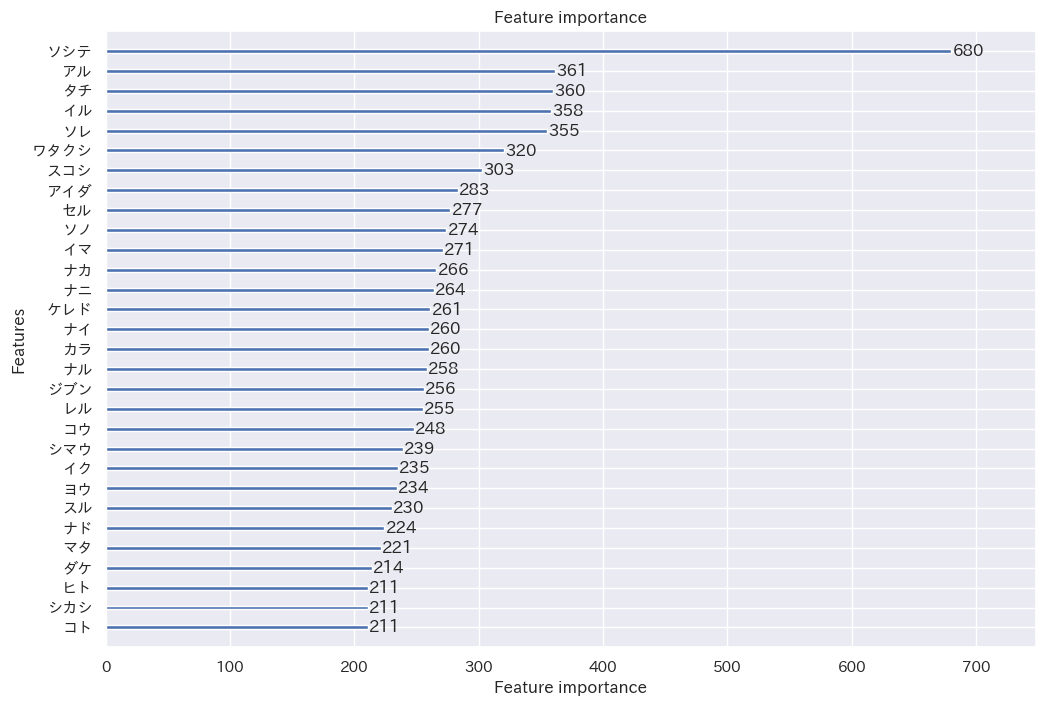

In [ ]:
# 特徴量の重要度をプロット
lgb.plot_importance(model, figsize=(12,8), max_num_features=30)
plt.show()
plt.close()

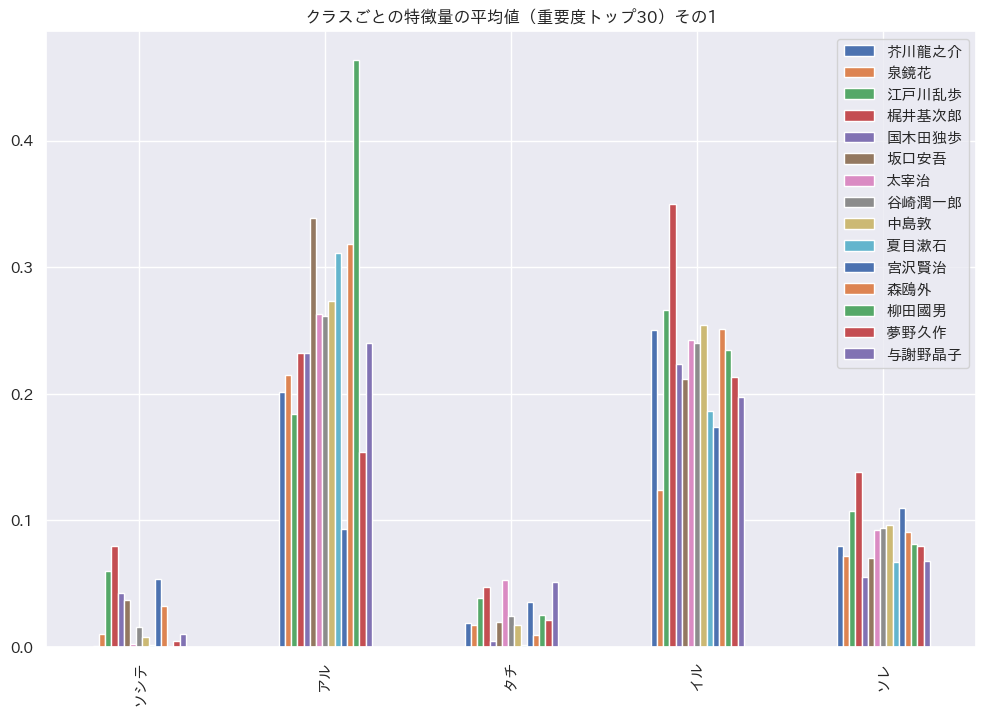

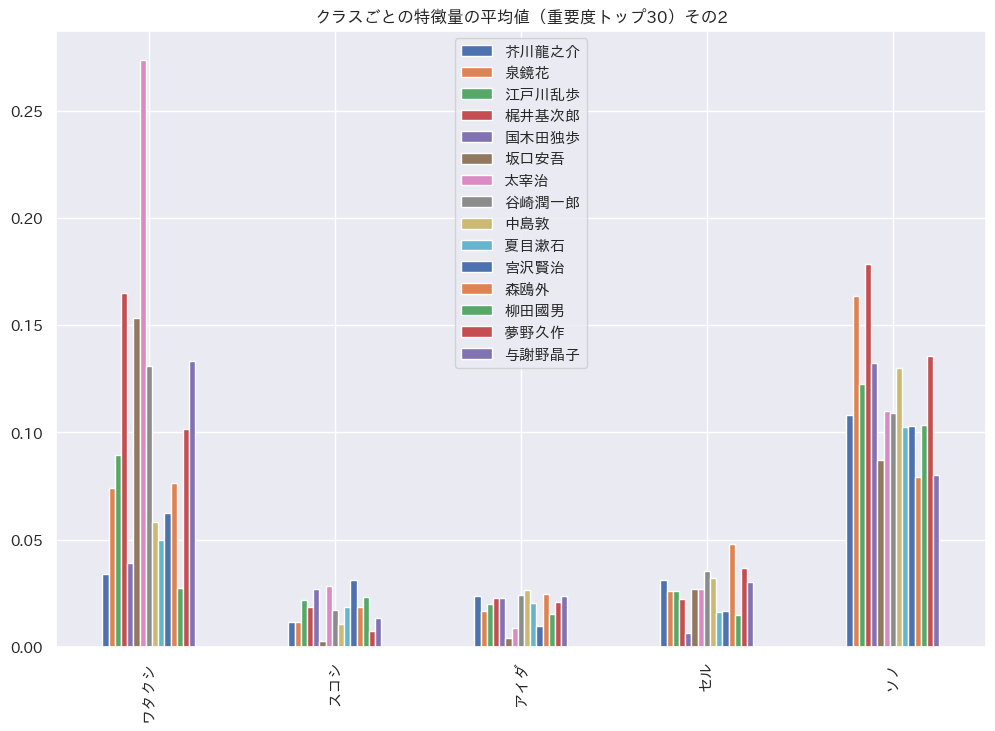

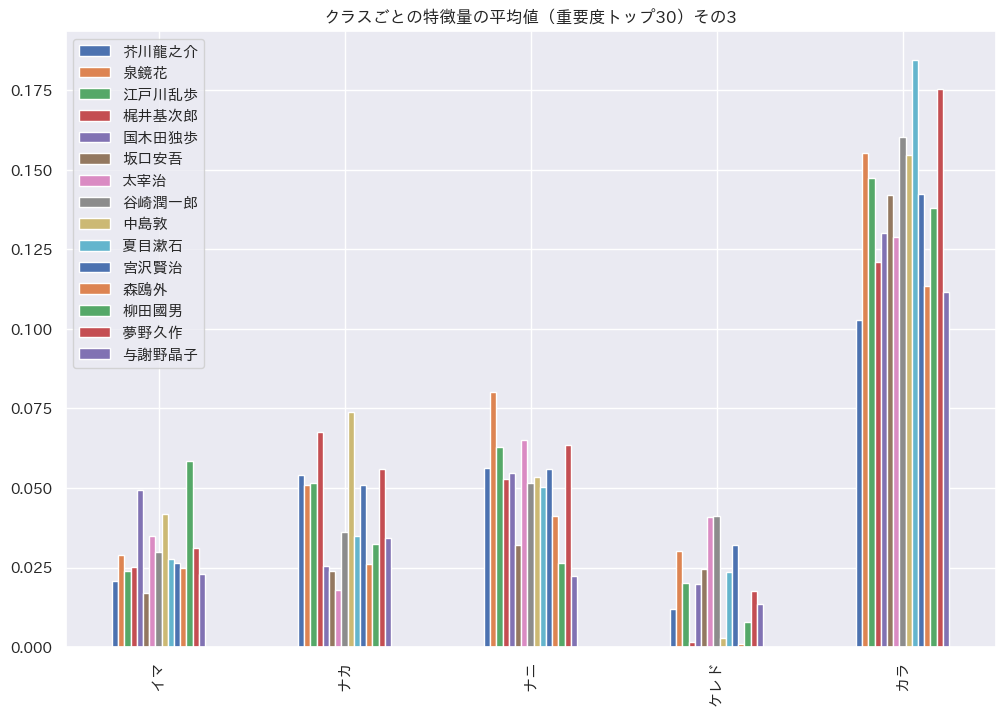

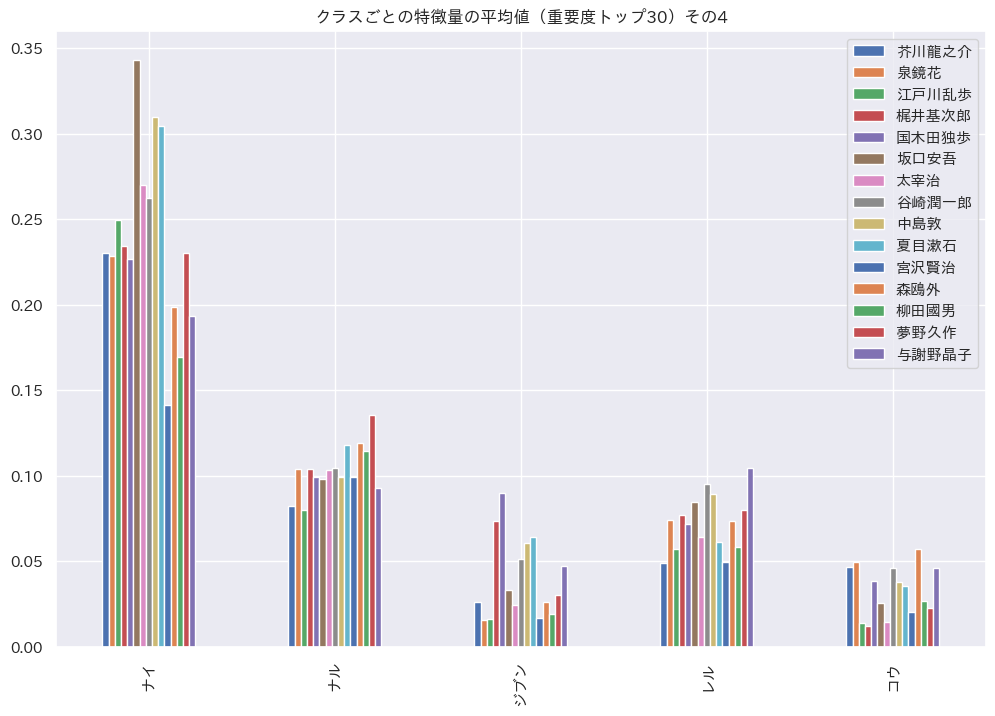

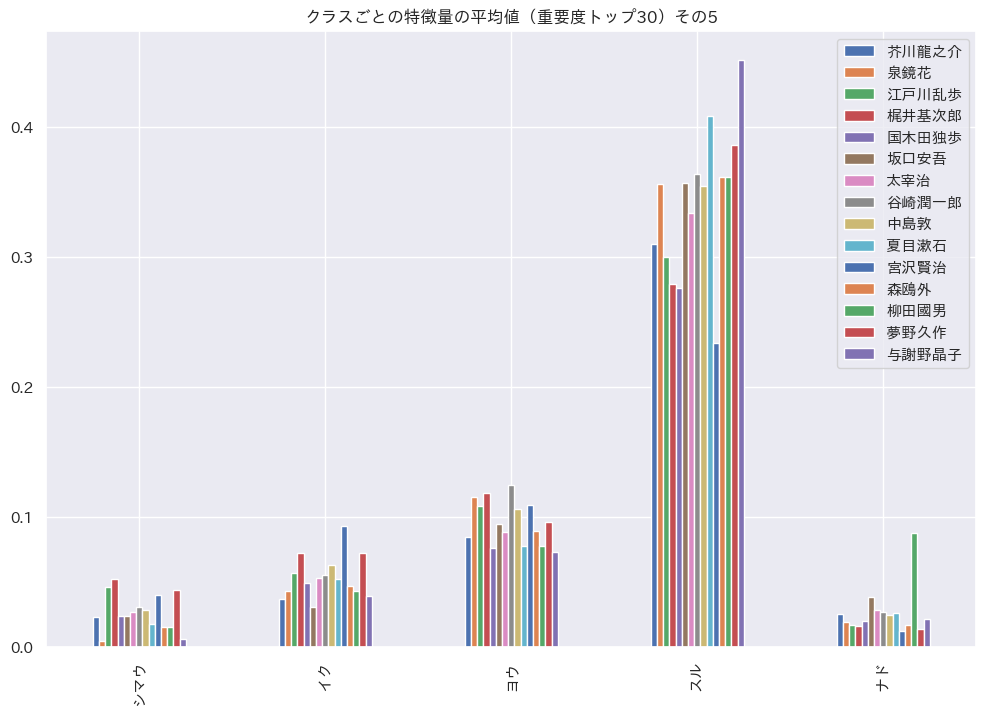

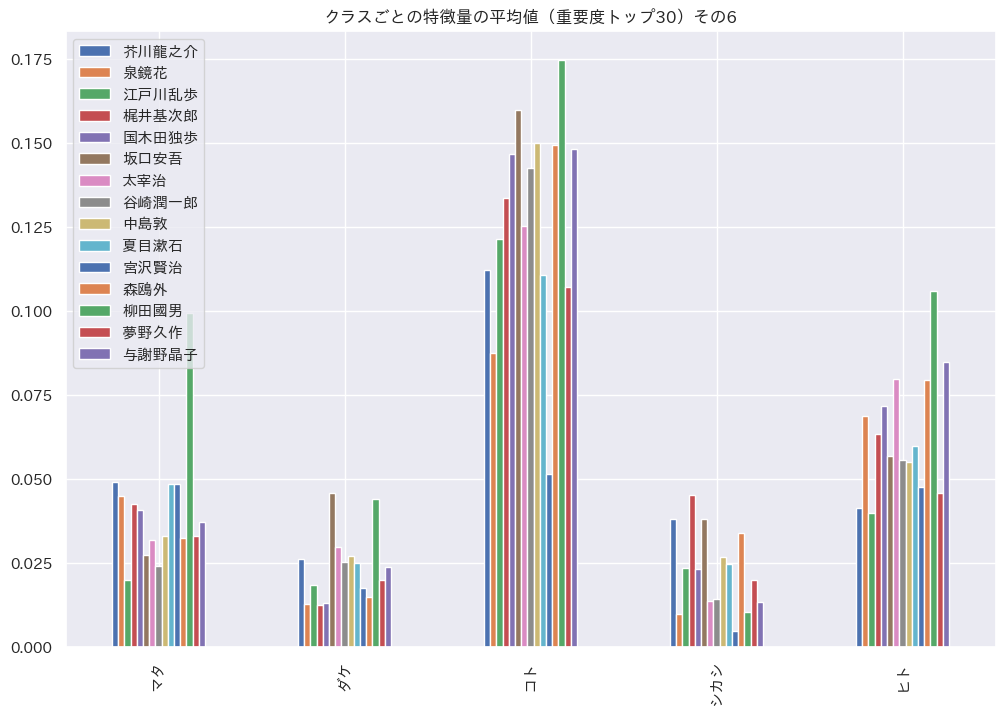

In [ ]:
# クラスごとの特徴量の平均値プロット
d_feature = {}
for fn, fi in zip(feature_names, model.feature_importance()):
    d_feature[fn] = fi

sorted_feature_names = [i[0] for i in sorted(d_feature.items(), key=lambda x:-x[1])][:30]

X_feature = []
k = 0
for idx in range(1, 31):
  fn = sorted_feature_names[idx-1]
  feature_list = []
  for target in range(15):
    feature_list.append(np.mean(X[(y == target), feature_names.index(fn)]))
  X_feature.append(feature_list)

  if idx % 5 == 0:
    df_feature = pd.DataFrame(X_feature, index=sorted_feature_names[5*k:5*(k+1)], columns=author_names)
    df_feature.plot.bar(figsize=(12, 8))
    plt.title(f'クラスごとの特徴量の平均値（重要度トップ30）その{k+1}')
    plt.show()
    plt.close()
    k += 1
    X_feature = []

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


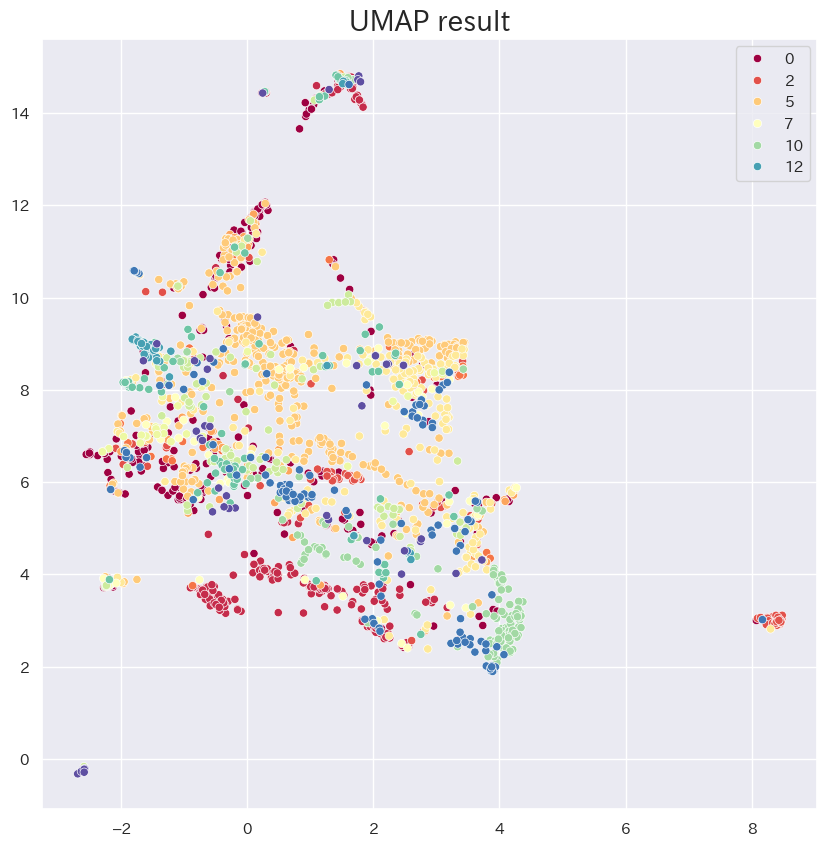

In [ ]:
# UMAPによる次元削減
X = df_vec.loc[:, df_train.columns != 'author'].values
y = df_vec['author'].values

mapping = umap.UMAP(random_state=0)
embedding = mapping.fit_transform(X)

# 可視化
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=y, palette='Spectral')
plt.title('UMAP result', fontsize=20)
plt.show()

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


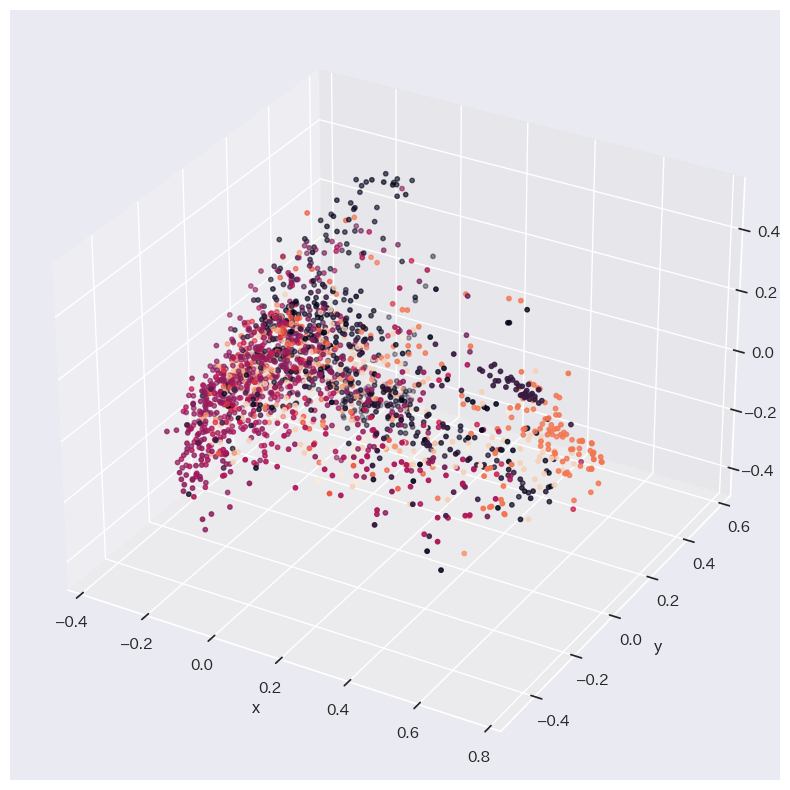

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot

# PCA による次元削減
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# 3次元の可視化
plot.figure(figsize=(12, 10))
axes = plot.axes(projection="3d")
print(type(axes))

axes.scatter3D(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, s=10)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
plot.show()

# Transformerを用いた分類

In [5]:
transformer = models.Transformer('cl-tohoku/bert-base-japanese-whole-word-masking')
pooling = models.Pooling(transformer.get_word_embedding_dimension(), pooling_mode_mean_tokens=True, pooling_mode_cls_token=False, pooling_mode_max_tokens=False)
lang_model = SentenceTransformer(modules=[transformer, pooling])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/258k [00:00<?, ?B/s]

In [7]:
from sklearn.model_selection import train_test_split

# df = pd.read_csv("/content/Buntai_Rating_text2.csv")

df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True, random_state=42, stratify=df['author'])
df_train, df_val = train_test_split(df_train, test_size=0.25, shuffle=True, random_state=42, stratify=df_train['author'])

target_num = 15

In [8]:
train_examples = []

for text in tqdm(df_train.itertuples()):
    train_examples.append(InputExample(texts=list(text[2]), label=text[1]))

data_loader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.BatchAllTripletLoss(lang_model)

lang_model.fit(
    train_objectives=[(data_loader, train_loss)],
    epochs=1,
    warmup_steps=100,
    output_path="./sbert1")

# 学習済みモデルの保存
# with open(DIR + 'Buntai_Rating_model.pickle', 'wb') as p:
#     pickle.dump(lang_model, p)

1121it [00:05, 209.85it/s]


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
# モデルのロード
# with open(DIR + 'model_after_fit.pickle', 'rb') as p:
#     model_after_fit = pickle.load(p)

In [ ]:
# それぞれのデータセットをencodeする
X_train_text = df_train.loc[:, df_train.columns != 'author']
X_train = lang_model.encode(list(X_train_text['body'].values))
y_train = df_train['author'].values

X_val_text = df_val.loc[:, df_val.columns != 'author']
X_val = lang_model.encode(list(X_val_text['body'].values))
y_val = df_val['author'].values

X_test_text = df_test.loc[:, df_test.columns != 'author']
X_test = lang_model.encode(list(X_test_text['body'].values))
y_test = df_test['author'].values

In [ ]:
# データセット作成
train_vec = pd.concat([pd.DataFrame({'author':y_train}),pd.DataFrame(X_train)], axis=1)
valid_vec = pd.concat([pd.DataFrame({'author':y_val}),pd.DataFrame(X_val)], axis=1)
test_vec = pd.concat([pd.DataFrame({'author':y_test}),pd.DataFrame(X_test)], axis=1)
# CSV ファイルとして出力
train_vec.to_csv("Buntai_Rating_train.csv", index=False)
valid_vec.to_csv("Buntai_Rating_valid.csv", index=False)
test_vec.to_csv("Buntai_Rating_test.csv", index=False)

In [ ]:
import lightgbm as lgb
from sklearn import metrics

# lightgbm による分類
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': target_num,
    'metric':'multi_logloss'
}

lgb_model = lgb.train(params, lgb_train, valid_sets=lgb_eval, callbacks=None, num_boost_round=100)

y_val_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
print("Valid Dara Log Loss: {}".format(metrics.log_loss(y_val, y_val_pred)))
y_val_pred = np.argmax(y_val_pred, axis=1)
print("Valid Data Accuracy: {}".format(metrics.accuracy_score(y_val, y_val_pred)))
print()

y_test_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
print("Test Data Log Loss: {}".format(metrics.log_loss(y_test, y_test_pred)))
y_test_pred = np.argmax(y_test_pred, axis=1)
print("Test Data Accuracy: {}".format(metrics.accuracy_score(y_test, y_test_pred)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# ロジスティック回帰 による分類
param_grid = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1.0, 2.0, 5.0, 10., 20.]}

lin_model = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, return_train_score=True)

lin_model.fit(X_train, y_train)

print('Best parameters: {}'.format(lin_model.best_params_))
print('Best cross-validation score: {}'.format(lin_model.best_score_))

y_val_pred = lin_model.predict(X_val)
print('Valid Data Log Loss: {}'.format(metrics.log_loss(y_val, y_val_pred)))
print('Valid Data Accuracy: {}'.format(lin_model.score(X_val, y_val)))

y_test_pred = lin_model.predict(X_test)
print('Test Data Log Loss: {}'.format(metrics.log_loss(y_test, y_test_pred)))
print('Test Data Accuracy: {}'.format(lin_model.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


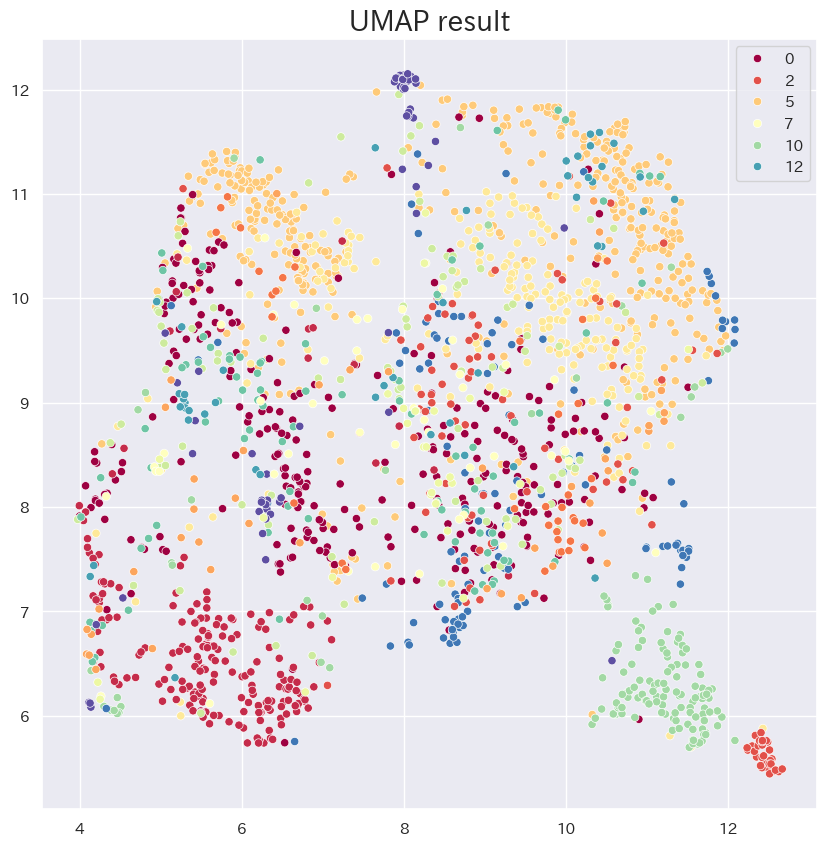

In [ ]:
import umap

# UMAPによる次元削減
X = df_vec.loc[:, df_train.columns != 'author'].values
y = df_vec['author'].values

mapping = umap.UMAP(random_state=0)
embedding = mapping.fit_transform(X)

# 可視化
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=y, palette='Spectral')
plt.title('UMAP result', fontsize=20)
plt.show()

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


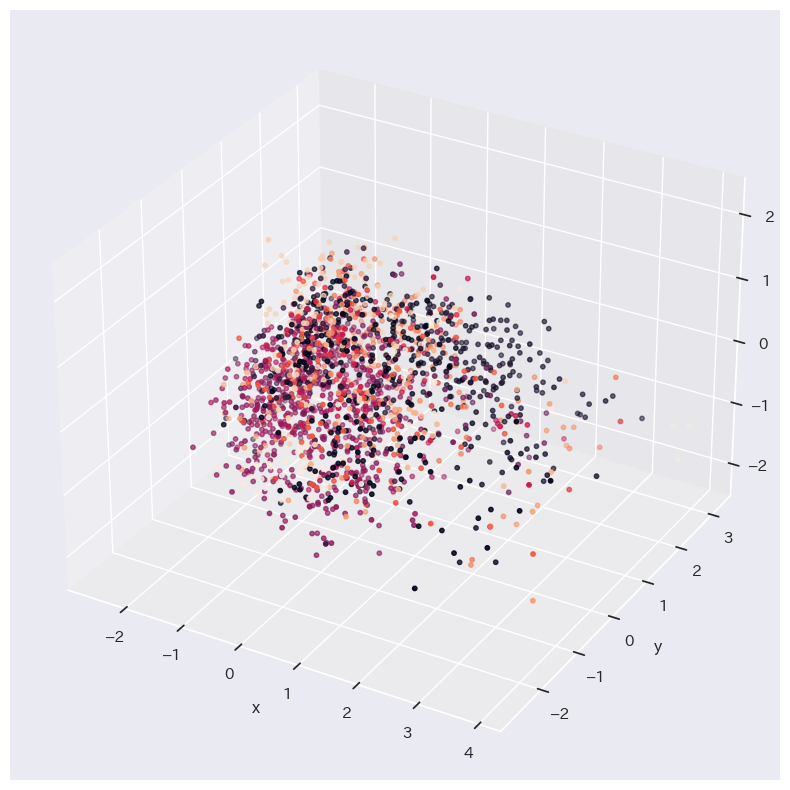

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot

# PCA による次元削減
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# 3次元の可視化
plot.figure(figsize=(12, 10))
axes = plot.axes(projection="3d")
print(type(axes))

axes.scatter3D(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, s=10)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
plot.show()

# cos類似度による文体類似度評価

In [ ]:
# 入力形式の選択
select = int(input("HTML形式なら1を、ファイル形式なら2を押してください。"))
if select == 1:
  url = input("URLを入力してください。")

  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  text = soup.find('div', class_='main_text')

  if text is not None:
    tags_to_delete = text.find_all(['rp', 'rt'])
    for tag in tags_to_delete:
        tag.decompose()
    text = text.get_text()
    text = extractbody(text)
  else:
    print("テキストがありません。")

elif select == 2:
    # Read the text file
  print("ファイルを読み込みます。")
  file_path = '/content/血と涙を混ぜられた色_武田由丸.docx'
  file_name, extension = file_path.split(".")

  # if extension == "txt":
  #   with open(file_path, "r") as f:
  #     print(f.read())

  if extension == "docx":
    !pip install docx2txt
    import docx2txt
    text = docx2txt.process(file_path)

  # 非推奨
  elif extension == "pdf":
    !pip install PyPDF2
    import PyPDF2
    pdf_reader = PyPDF2.PdfReader(file_path)
    num_pages = len(pdf_reader.pages)
    text = ""
    for page in range(num_pages):
        page_obj = pdf_reader.pages[page]
        text += page_obj.extract_text()

  else:
    print("非対応の形式です。")
    exit()

  text = extractbody(text)
  if text == "":
    print("テキストが存在しません。")

else:
  print("1 あるいは 2 を入力してください。")

HTML形式なら1を、ファイル形式なら2を押してください。2
ファイルを読み込みます。
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=0f3e01fe4f6cb16abc54a7088c68d4f106c0d912f2a0df6fd0024fa2d1c83825
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [ ]:
from sentence_transformers import util
from statistics import mean, median,variance,stdev
from scipy.stats import norm
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

embedding = lang_model.encode(text)

# 類似度を計算する
def calculate_similarity(embedding):
  similarities = {}
  similarities_mean = []
  similarities_max = []
  similarities_all = []
  for data in df_vec.itertuples():
    idx = data[1]
    vec = data[2:]
    if idx not in similarities.keys():
      similarities[idx] = []
    similarity = util.cos_sim(embedding, vec)
    similarities[idx].append(float(similarity))
    similarities_all.append(float(similarity))
  for idx in range(15):
    similarities_mean.append(mean(similarities[idx]))
    similarities_max.append(max(similarities[idx]))
  return similarities_mean, similarities_max, similarities_all


sim_mean, sim_max, sim_all = calculate_similarity(embedding)

# 類似度の標準化を行う
# そのままでは全作家に対して類似度が高くなるため
sim_mean_mean = mean(sim_mean)
sim_mean_std = stdev(sim_mean)
for idx in range(15):
  sim_mean[idx] = norm.cdf(sim_mean[idx], sim_mean_mean, sim_mean_std)

sim_all_mean = mean(sim_all)
sim_all_std = stdev(sim_all)
for idx in range(15):
  sim_max[idx] = norm.cdf(sim_max[idx], sim_all_mean, sim_all_std)

# 分析結果
print("【平均類似度】")
for i, author in enumerate(authors_label.keys()):
  print("{}: {} 点".format(author, Decimal(str(sim_mean[i]*100)).quantize(Decimal('0'), ROUND_HALF_UP)))
print()
print("【最大類似度】")
for i, author in enumerate(authors_label.keys()):
  print("{}: {} 点".format(author, Decimal(str(sim_max[i]*100)).quantize(Decimal('0'), ROUND_HALF_UP)))

【平均類似度】
芥川龍之介: 61 点
泉鏡花: 2 点
江戸川乱歩: 77 点
梶井基次郎: 94 点
国木田独歩: 26 点
坂口安吾: 89 点
太宰治: 72 点
谷崎潤一郎: 17 点
中島敦: 82 点
夏目漱石: 58 点
宮沢賢治: 12 点
森鴎外: 15 点
柳田國男: 50 点
夢野久作: 75 点
与謝野晶子: 37 点

【最大類似度】
芥川龍之介: 91 点
泉鏡花: 78 点
江戸川乱歩: 92 点
梶井基次郎: 94 点
国木田独歩: 84 点
坂口安吾: 94 点
太宰治: 89 点
谷崎潤一郎: 87 点
中島敦: 87 点
夏目漱石: 93 点
宮沢賢治: 79 点
森鴎外: 85 点
柳田國男: 86 点
夢野久作: 92 点
与謝野晶子: 90 点
